## Clean Slate for Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import index_natsorted

In [2]:
# import the data
filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'E2F5_E2F5_HUMAN.H11MO.0.B'

In [3]:
matrix_afps

Chromosome      Start        End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0          chr1     905473     905483           0.10260            0.12218   
1          chr1     925405     925415           0.09540            0.03670   
2          chr1    1020750    1020760           0.09749            0.09080   
3          chr1    1130413    1130423           0.11471            0.04786   
4          chr1    1225277    1225287           0.01792            0.04624   
...         ...        ...        ...               ...                ...   
2180       chrX  118300271  118300281           0.00703            0.00985   
2181       chrX  119211181  119211191           0.01215            0.01187   
2182       chrX  139342109  139342119           0.02016            0.00831   
2183       chrX  147508113  147508123           0.00810            0.00633   
2184       chrX  150849074  150849084           0.34392            0.07363   

      S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0              0.13921           0.12024           0.14062   
1              0.09011           0.05082           0.05586   
2              0.07864           0.10880           0.08458   
3              0.11338           0.14384           0.15151   
4              0.02729           0.01957           0.02657   
...                ...               ...               ...   
2180           0.00556           0.00611           0.00910   
2181           0.01025           0.01366           0.01454   
2182           0.02155           0.01655           0.02160   
2183           0.00697           0.00629           0.01465   
2184           0.35995           0.24735           0.20522   

      2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                          NaN                     NaN  ...         0.000000   
1                     925409.0                       T  ...         0.730769   
2                    1020755.0                       C  ...         0.000000   
3                    1130420.0                       C  ...         0.062500   
4                    1225285.0                       G  ...         0.062500   
...                        ...                     ...  ...              ...   
2180                       NaN                     NaN  ...         0.000000   
2181                       NaN                     NaN  ...         0.093750   
2182                       NaN                     NaN  ...         0.000000   
2183                       NaN                     NaN  ...         0.045455   
2184               150849077.0                       C  ...         0.600000   

      PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                     905474.0                        G   
1                     925409.0                        T   
2                          NaN                      NaN   
3                    1130420.0                        C   
4                    1225285.0                        G   
...                        ...                      ...   
2180               118300279.0                        G   
2181                       NaN                      NaN   
2182                       NaN                      NaN   
2183                       NaN                      NaN   
2184               150849077.0                        C   

     PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                          A        0.027778                       NaN   
1                          C        0.769231                  925409.0   
2                        NaN        0.000000                       NaN   
3                          T        0.131579                 1130420.0   
4                          A        0.078947                 1225285.0   
...                      ...             ...                       ...   
2180                       A        0.071429                       NaN   
2181                     NaN        0.000000               11

In [4]:
matrix_afps = matrix_afps.filter(regex='_AF$|_fps$|_id$')
matrix_afps

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.10260            0.12218           0.13921           0.12024   
1              0.09540            0.03670           0.09011           0.05082   
2              0.09749            0.09080           0.07864           0.10880   
3              0.11471            0.04786           0.11338           0.14384   
4              0.01792            0.04624           0.02729           0.01957   
...                ...                ...               ...               ...   
2180           0.00703            0.00985           0.00556           0.00611   
2181           0.01215            0.01187           0.01025           0.01366   
2182           0.02016            0.00831           0.02155           0.01655   
2183           0.00810            0.00633           0.00697           0.00629   
2184           0.34392            0.07363           0.35995           0.24735   

      2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
0              0.14062         0.000000         0.000000          0.000000   
1              0.05586         1.000000         1.000000          0.730769   
2              0.08458         0.062500         0.000000          0.000000   
3              0.15151         0.250000         0.181818          0.062500   
4              0.02657         0.071429         0.090909          0.062500   
...                ...              ...              ...               ...   
2180           0.00910         0.000000         0.000000          0.000000   
2181           0.01454         0.000000         0.050000          0.093750   
2182           0.02160         0.000000         0.000000          0.000000   
2183           0.01465         0.000000         0.000000          0.045455   
2184           0.20522         0.750000         0.500000          0.600000   

      PU24GB8_lumB_AF  S6R691V_her2_AF                 region_id  
0            0.027778         0.000000        chr1:905473-905483  
1            0.769231         0.730769        chr1:925405-925415  
2            0.000000         0.000000      chr1:1020750-1020760  
3            0.131579         0.147059      chr1:1130413-1130423  
4            0.078947         0.088235      chr1:1225277-1225287  
...               ...              ...                       ...  
2180         0.071429         0.000000  chrX:118300271-118300281  
2181         0.000000         0.062500  chrX:119211181-119211191  
2182         0.000000         0.066667  chrX:139342109-139342119  
2183         0.000000         0.000000  chrX:147508113-147508123  
2184         0.605263         0.588235  chrX:150849074-150849084  

[2185 rows x 11 columns]

In [5]:
# convert to long format
matrix_afps_long = matrix_afps.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
matrix_afps_long[['sample_id', 'type']] = matrix_afps_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
matrix_afps_long = matrix_afps_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
matrix_afps_lpv = matrix_afps_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
matrix_afps_lpv = matrix_afps_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
matrix_afps_lpv = matrix_afps_lpv.reindex(index=index_natsorted(matrix_afps_lpv['region_id']))
matrix_afps_lpv = matrix_afps_lpv.reset_index(drop=True)
matrix_afps_lpv


region_id      sample_id        AF      FPS
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921
...                         ...            ...       ...      ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995

[10925 rows x 4 columns]

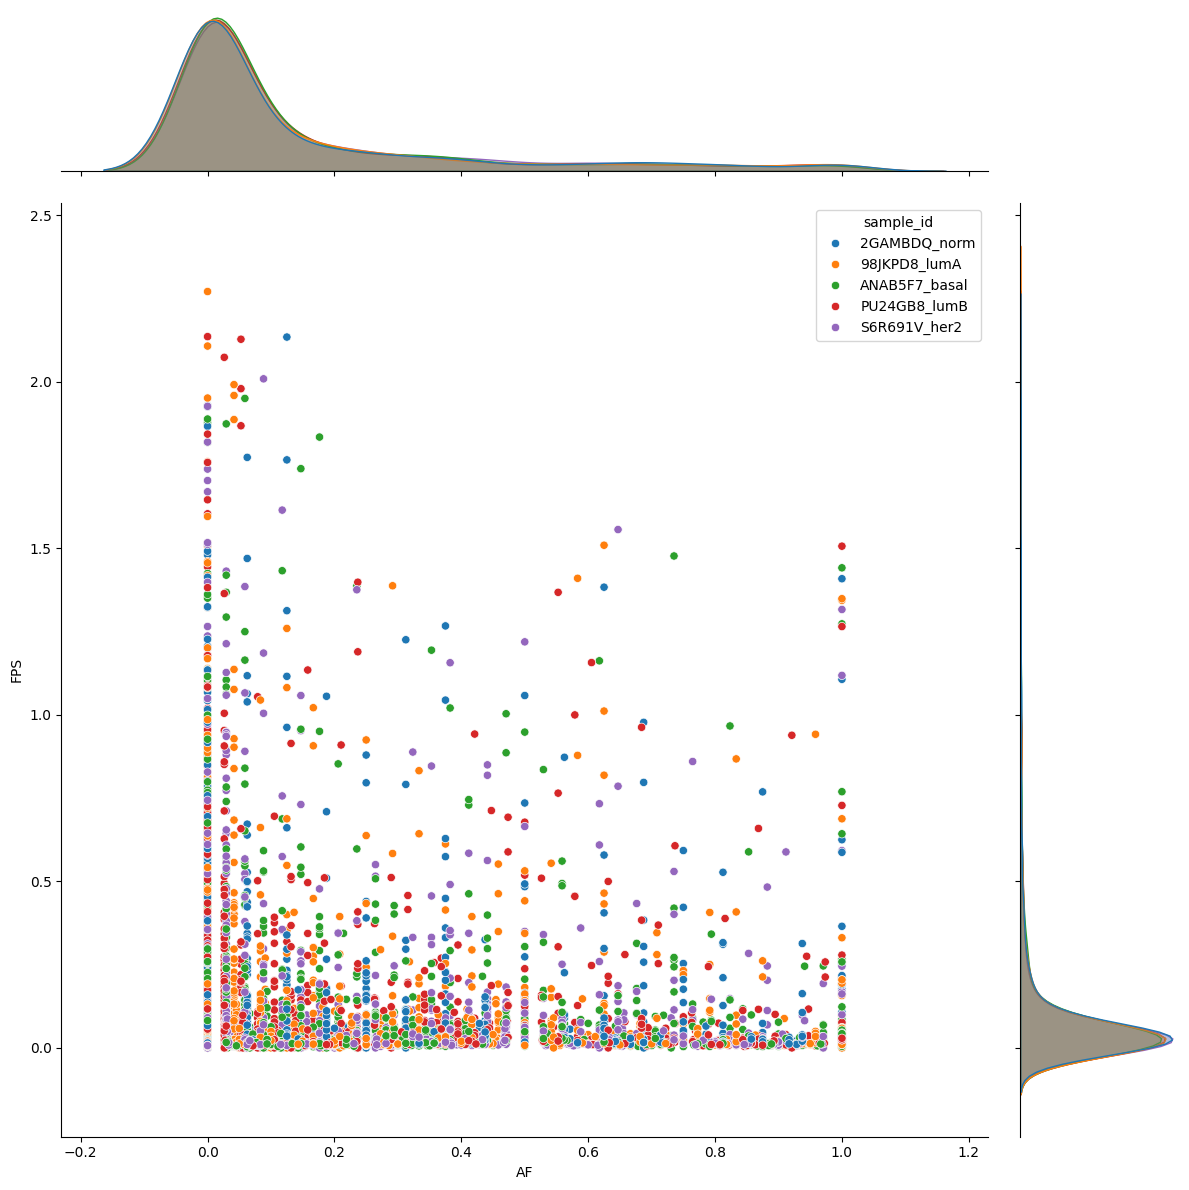

In [6]:
sns.jointplot(x="AF", y="FPS", data=matrix_afps_lpv, hue='sample_id', height=12)
plt.show()
# plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-scatterplots/{motif_id}_afps-jointplot-unfilt.png', dpi=300, bbox_inches='tight')

Now, we can plot a stacked bar plot with the bars sorted based on the total AF values across subtypes.

In [7]:
# subset the first 100 rows of the dataframe
# matrix_afps_longpivot_subset = matrix_afps_longpivot.head(100)

# Calculate the cumulative 'AF' for each 'region_id'
cumulative_af = matrix_afps_lpv.groupby('region_id')['AF'].sum().reset_index().rename(columns={'AF': 'cumulative_AF'})

# set the index to 'region_id' and then sort the dataframe by 'AF' in descending order
cumulative_af = cumulative_af.set_index('region_id').sort_values(by='cumulative_AF', ascending=False)
cumulative_af

cumulative_AF
region_id                               
chr10:117537379-117537389            5.0
chr10:121481810-121481820            5.0
chr18:24543887-24543897              5.0
chr13:75393456-75393466              5.0
chr16:10308906-10308916              5.0
...                                  ...
chr20:29320400-29320410              0.0
chr20:49046320-49046330              0.0
chr14:23321300-23321310              0.0
chr5:7016076-7016086                 0.0
chr5:81188837-81188847               0.0

[2185 rows x 1 columns]

We can now reorder the original matrix based on the region_id index order in the sorted cumulative_AF dataframe above. 

In [8]:
with pd.option_context('mode.chained_assignment', None):
    # Create a categorical variable with ordered categories
	matrix_afps_lpv['region_id'] = pd.Categorical(matrix_afps_lpv['region_id'], categories=cumulative_af.index.unique(), ordered=True)

	# Sort by the categorical 'region_id'
	matrix_afps_lpv = matrix_afps_lpv.sort_values('region_id')

matrix_afps_lpv

region_id      sample_id   AF      FPS
6280  chr10:117537379-117537389   2GAMBDQ_norm  1.0  0.02423
6281  chr10:117537379-117537389   98JKPD8_lumA  1.0  0.02195
6282  chr10:117537379-117537389  ANAB5F7_basal  1.0  0.02075
6283  chr10:117537379-117537389   PU24GB8_lumB  1.0  0.02306
6284  chr10:117537379-117537389   S6R691V_her2  1.0  0.03269
...                         ...            ...  ...      ...
3192     chr5:81188837-81188847  ANAB5F7_basal  0.0  0.00754
3191     chr5:81188837-81188847   98JKPD8_lumA  0.0  0.00943
3194     chr5:81188837-81188847   S6R691V_her2  0.0  0.00767
3193     chr5:81188837-81188847   PU24GB8_lumB  0.0  0.01154
3190     chr5:81188837-81188847   2GAMBDQ_norm  0.0  0.01006

[10925 rows x 4 columns]

Next, sort the sample_id values per each unique region_id by a specific order. This order is based on the lexicographic order of the sample_id values in the original matrix.

In [9]:
# get unique sample_id values into a list to define a categorical order
datasets = matrix_afps_lpv['sample_id'].unique().tolist()
datasets = sorted(datasets)

# Create a categorical variable with ordered categories
matrix_afps_lpv['sample_id'] = pd.Categorical(matrix_afps_lpv['sample_id'], categories=datasets, ordered=True)

# Sort 'sample_id' within each 'region_id'
matrix_afps_regsorted = matrix_afps_lpv.groupby('region_id', sort=False, observed=False).apply(lambda x: x.sort_values('sample_id')).reset_index(drop=True)

matrix_afps_regsorted

region_id      sample_id   AF      FPS
0      chr10:117537379-117537389   2GAMBDQ_norm  1.0  0.02423
1      chr10:117537379-117537389   98JKPD8_lumA  1.0  0.02195
2      chr10:117537379-117537389  ANAB5F7_basal  1.0  0.02075
3      chr10:117537379-117537389   PU24GB8_lumB  1.0  0.02306
4      chr10:117537379-117537389   S6R691V_her2  1.0  0.03269
...                          ...            ...  ...      ...
10920     chr5:81188837-81188847   2GAMBDQ_norm  0.0  0.01006
10921     chr5:81188837-81188847   98JKPD8_lumA  0.0  0.00943
10922     chr5:81188837-81188847  ANAB5F7_basal  0.0  0.00754
10923     chr5:81188837-81188847   PU24GB8_lumB  0.0  0.01154
10924     chr5:81188837-81188847   S6R691V_her2  0.0  0.00767

[10925 rows x 4 columns]

In [10]:
# truncate the dataframe to the first 5% of region_id values of all unique region_id values
matrix_afps_trunc = matrix_afps_regsorted.head(int(len(matrix_afps_regsorted['region_id'].unique())*0.05)*5)
matrix_afps_trunc.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/test-ground/{motif_id}_afps-trunc.txt', sep='\t', index=False)
matrix_afps_trunc

region_id      sample_id        AF      FPS
0    chr10:117537379-117537389   2GAMBDQ_norm  1.000000  0.02423
1    chr10:117537379-117537389   98JKPD8_lumA  1.000000  0.02195
2    chr10:117537379-117537389  ANAB5F7_basal  1.000000  0.02075
3    chr10:117537379-117537389   PU24GB8_lumB  1.000000  0.02306
4    chr10:117537379-117537389   S6R691V_her2  1.000000  0.03269
..                         ...            ...       ...      ...
540   chr2:112181535-112181545   2GAMBDQ_norm  0.785714  0.01765
541   chr2:112181535-112181545   98JKPD8_lumA  0.681818  0.01544
542   chr2:112181535-112181545  ANAB5F7_basal  0.633333  0.02172
543   chr2:112181535-112181545   PU24GB8_lumB  0.805556  0.02371
544   chr2:112181535-112181545   S6R691V_her2  0.714286  0.02725

[545 rows x 4 columns]

In [11]:
# read in file
test_df = pd.read_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/test-ground/{motif_id}_afps-trunc.txt', sep='\t')
test_df

region_id      sample_id        AF      FPS
0    chr10:117537379-117537389   2GAMBDQ_norm  1.000000  0.02423
1    chr10:117537379-117537389   98JKPD8_lumA  1.000000  0.02195
2    chr10:117537379-117537389  ANAB5F7_basal  1.000000  0.02075
3    chr10:117537379-117537389   PU24GB8_lumB  1.000000  0.02306
4    chr10:117537379-117537389   S6R691V_her2  1.000000  0.03269
..                         ...            ...       ...      ...
540   chr2:112181535-112181545   2GAMBDQ_norm  0.785714  0.01765
541   chr2:112181535-112181545   98JKPD8_lumA  0.681818  0.01544
542   chr2:112181535-112181545  ANAB5F7_basal  0.633333  0.02172
543   chr2:112181535-112181545   PU24GB8_lumB  0.805556  0.02371
544   chr2:112181535-112181545   S6R691V_her2  0.714286  0.02725

[545 rows x 4 columns]

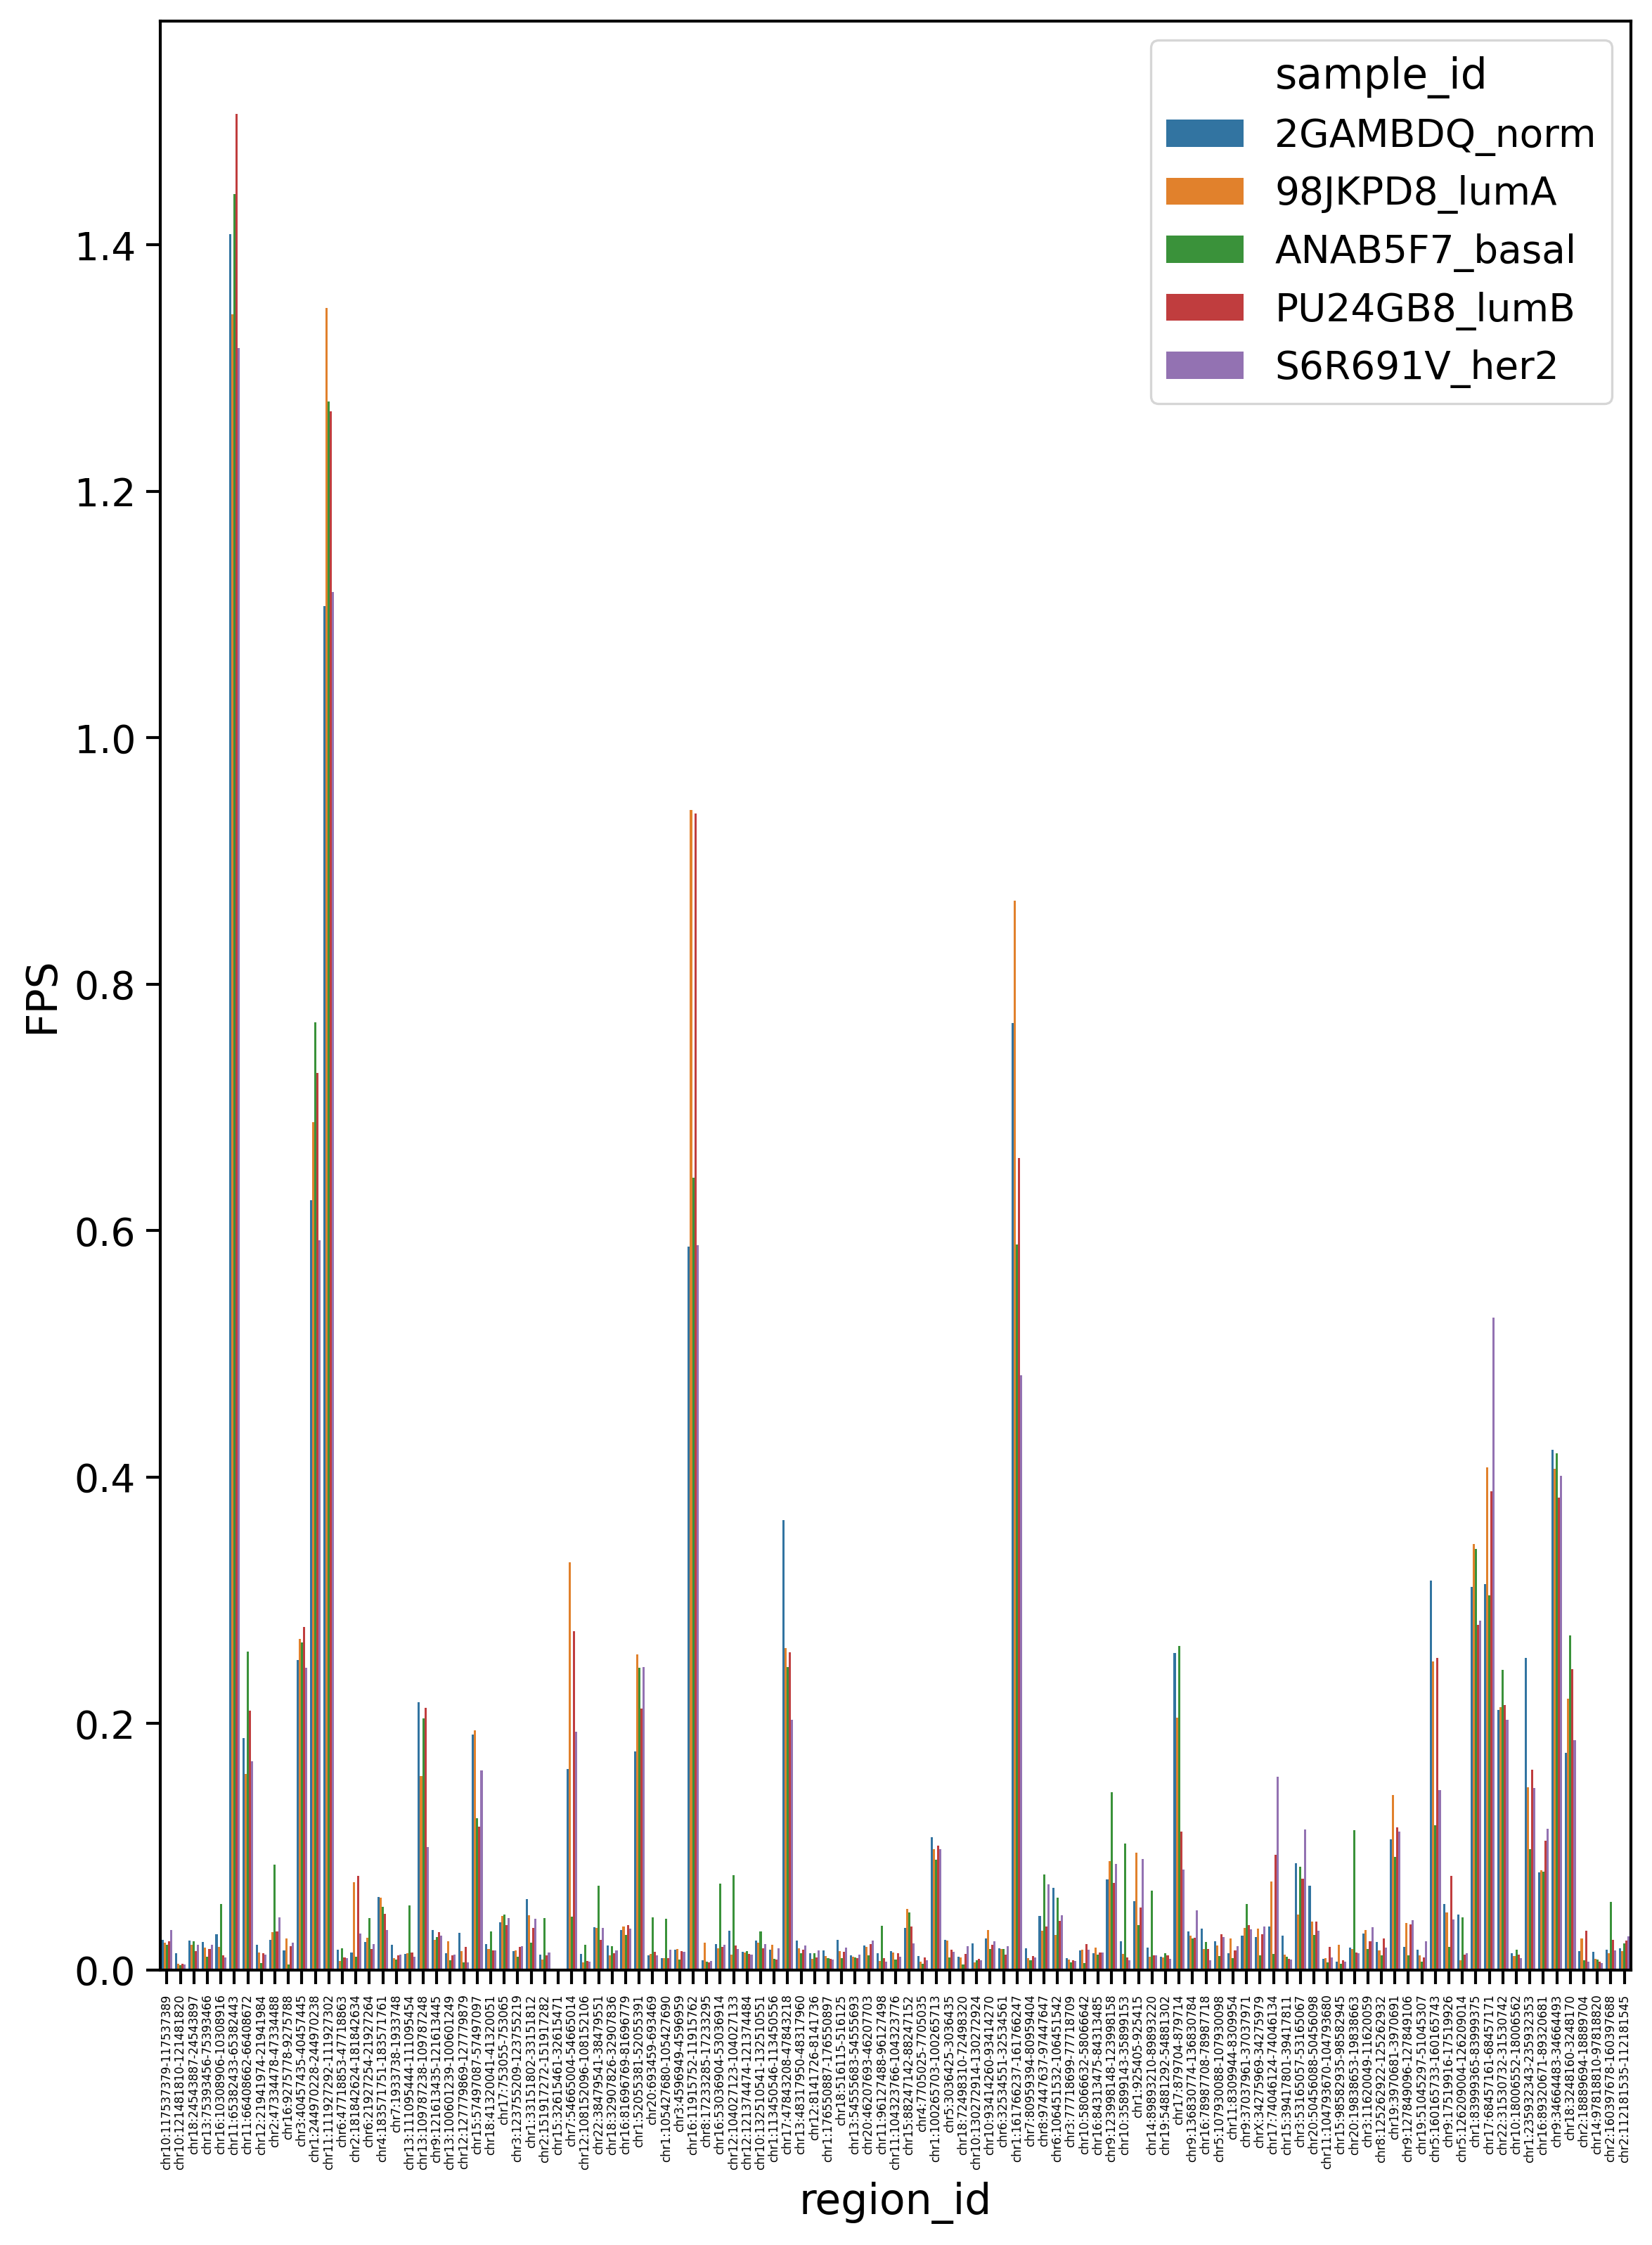

In [12]:
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(9, 12), dpi=300)
# draw line plot of FPS values across region IDs
sns.barplot(x='region_id', y='FPS', hue='sample_id', data=test_df, ax=ax)
plt.xticks(rotation=90, fontsize=4)
plt.show()

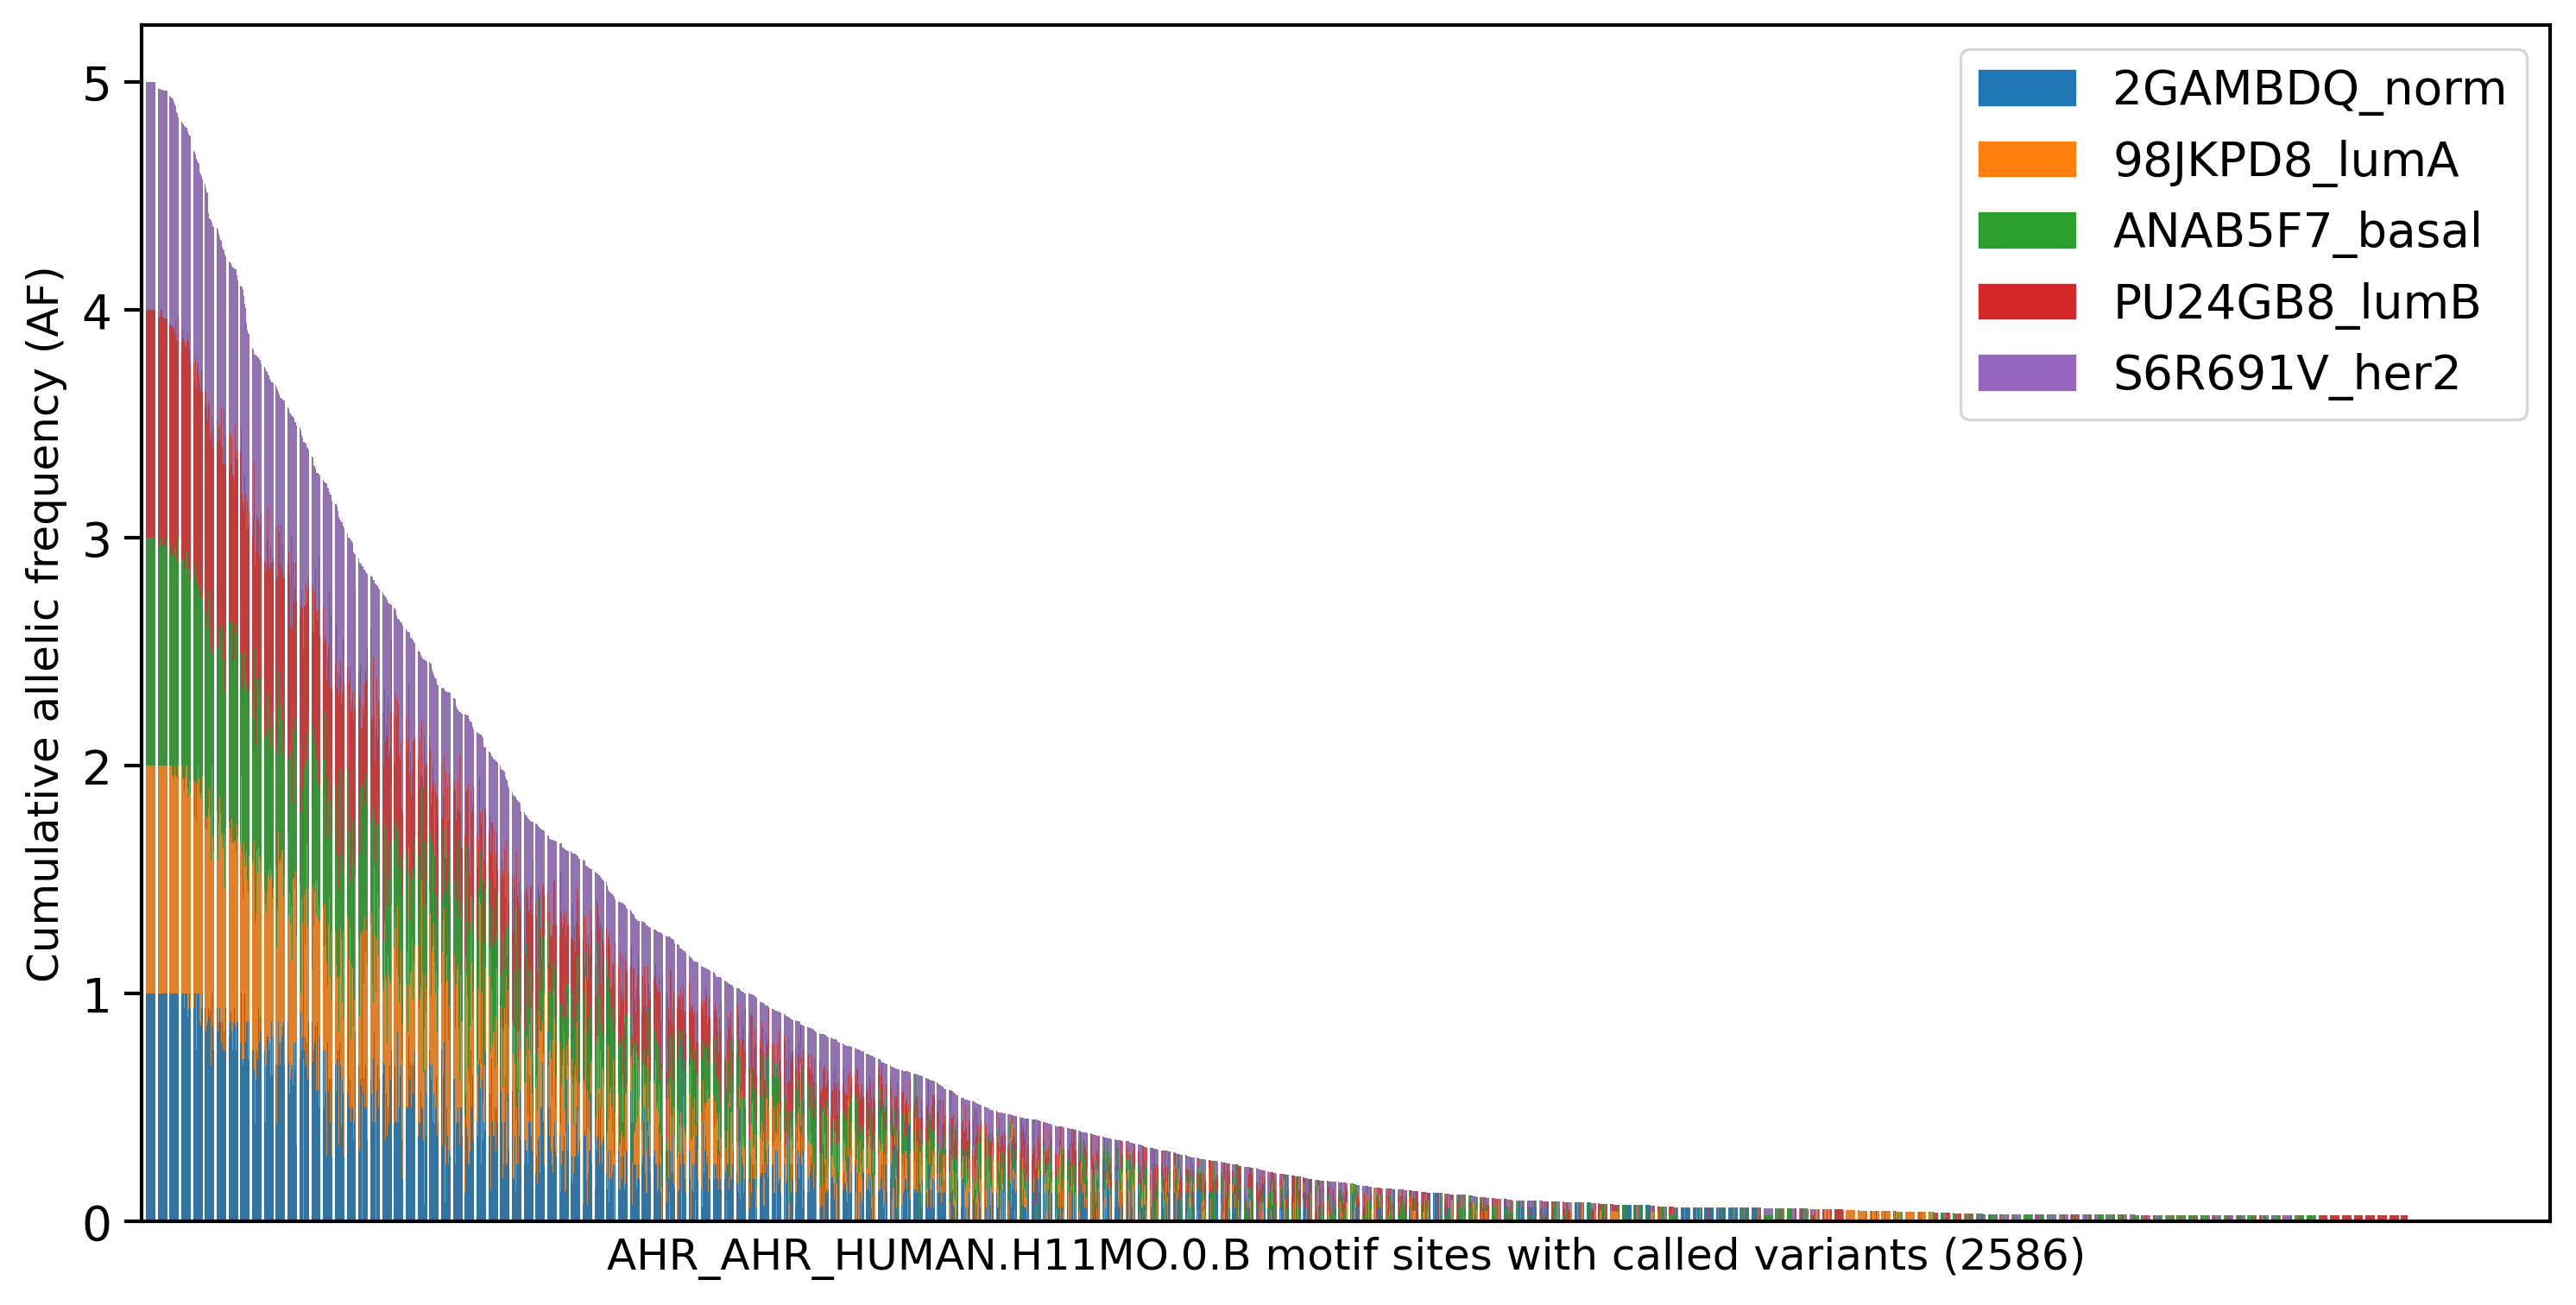

In [27]:
import matplotlib.patches as mpatches

# Get a list of unique 'sample_id' values
sample_ids = matrix_afps_regsorted['sample_id'].unique()

# plot the sorted stacked bar plot
plt.figure(figsize=(12,6), dpi=300)

# Initialize a zero array for the 'bottom' parameter of the bar plot
bottom = np.zeros(len(matrix_afps_regsorted['region_id'].unique()))

# For each 'sample_id'
for i, sample_id in enumerate(sample_ids):
    # Get the 'AF' values for this 'sample_id'
    data = matrix_afps_regsorted[matrix_afps_regsorted['sample_id'] == sample_id]

    # Create a bar plot for this 'sample_id', stacked on top of the previous one
    sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

    # Update 'bottom' for the next 'sample_id'
    bottom += data['AF'].values

# Create a patch for each 'sample_id'
patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# Add the legend to the plot
plt.legend(handles=patches)

plt.xticks([])
plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
plt.xlabel(f'{motif_id} motif sites with called variants ({matrix_afps_regsorted['region_id'].nunique()})', fontsize=12) 
plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/unfilt-barplots/{motif_id}_afps-barplot-unfilt.png', dpi=300, bbox_inches='tight')

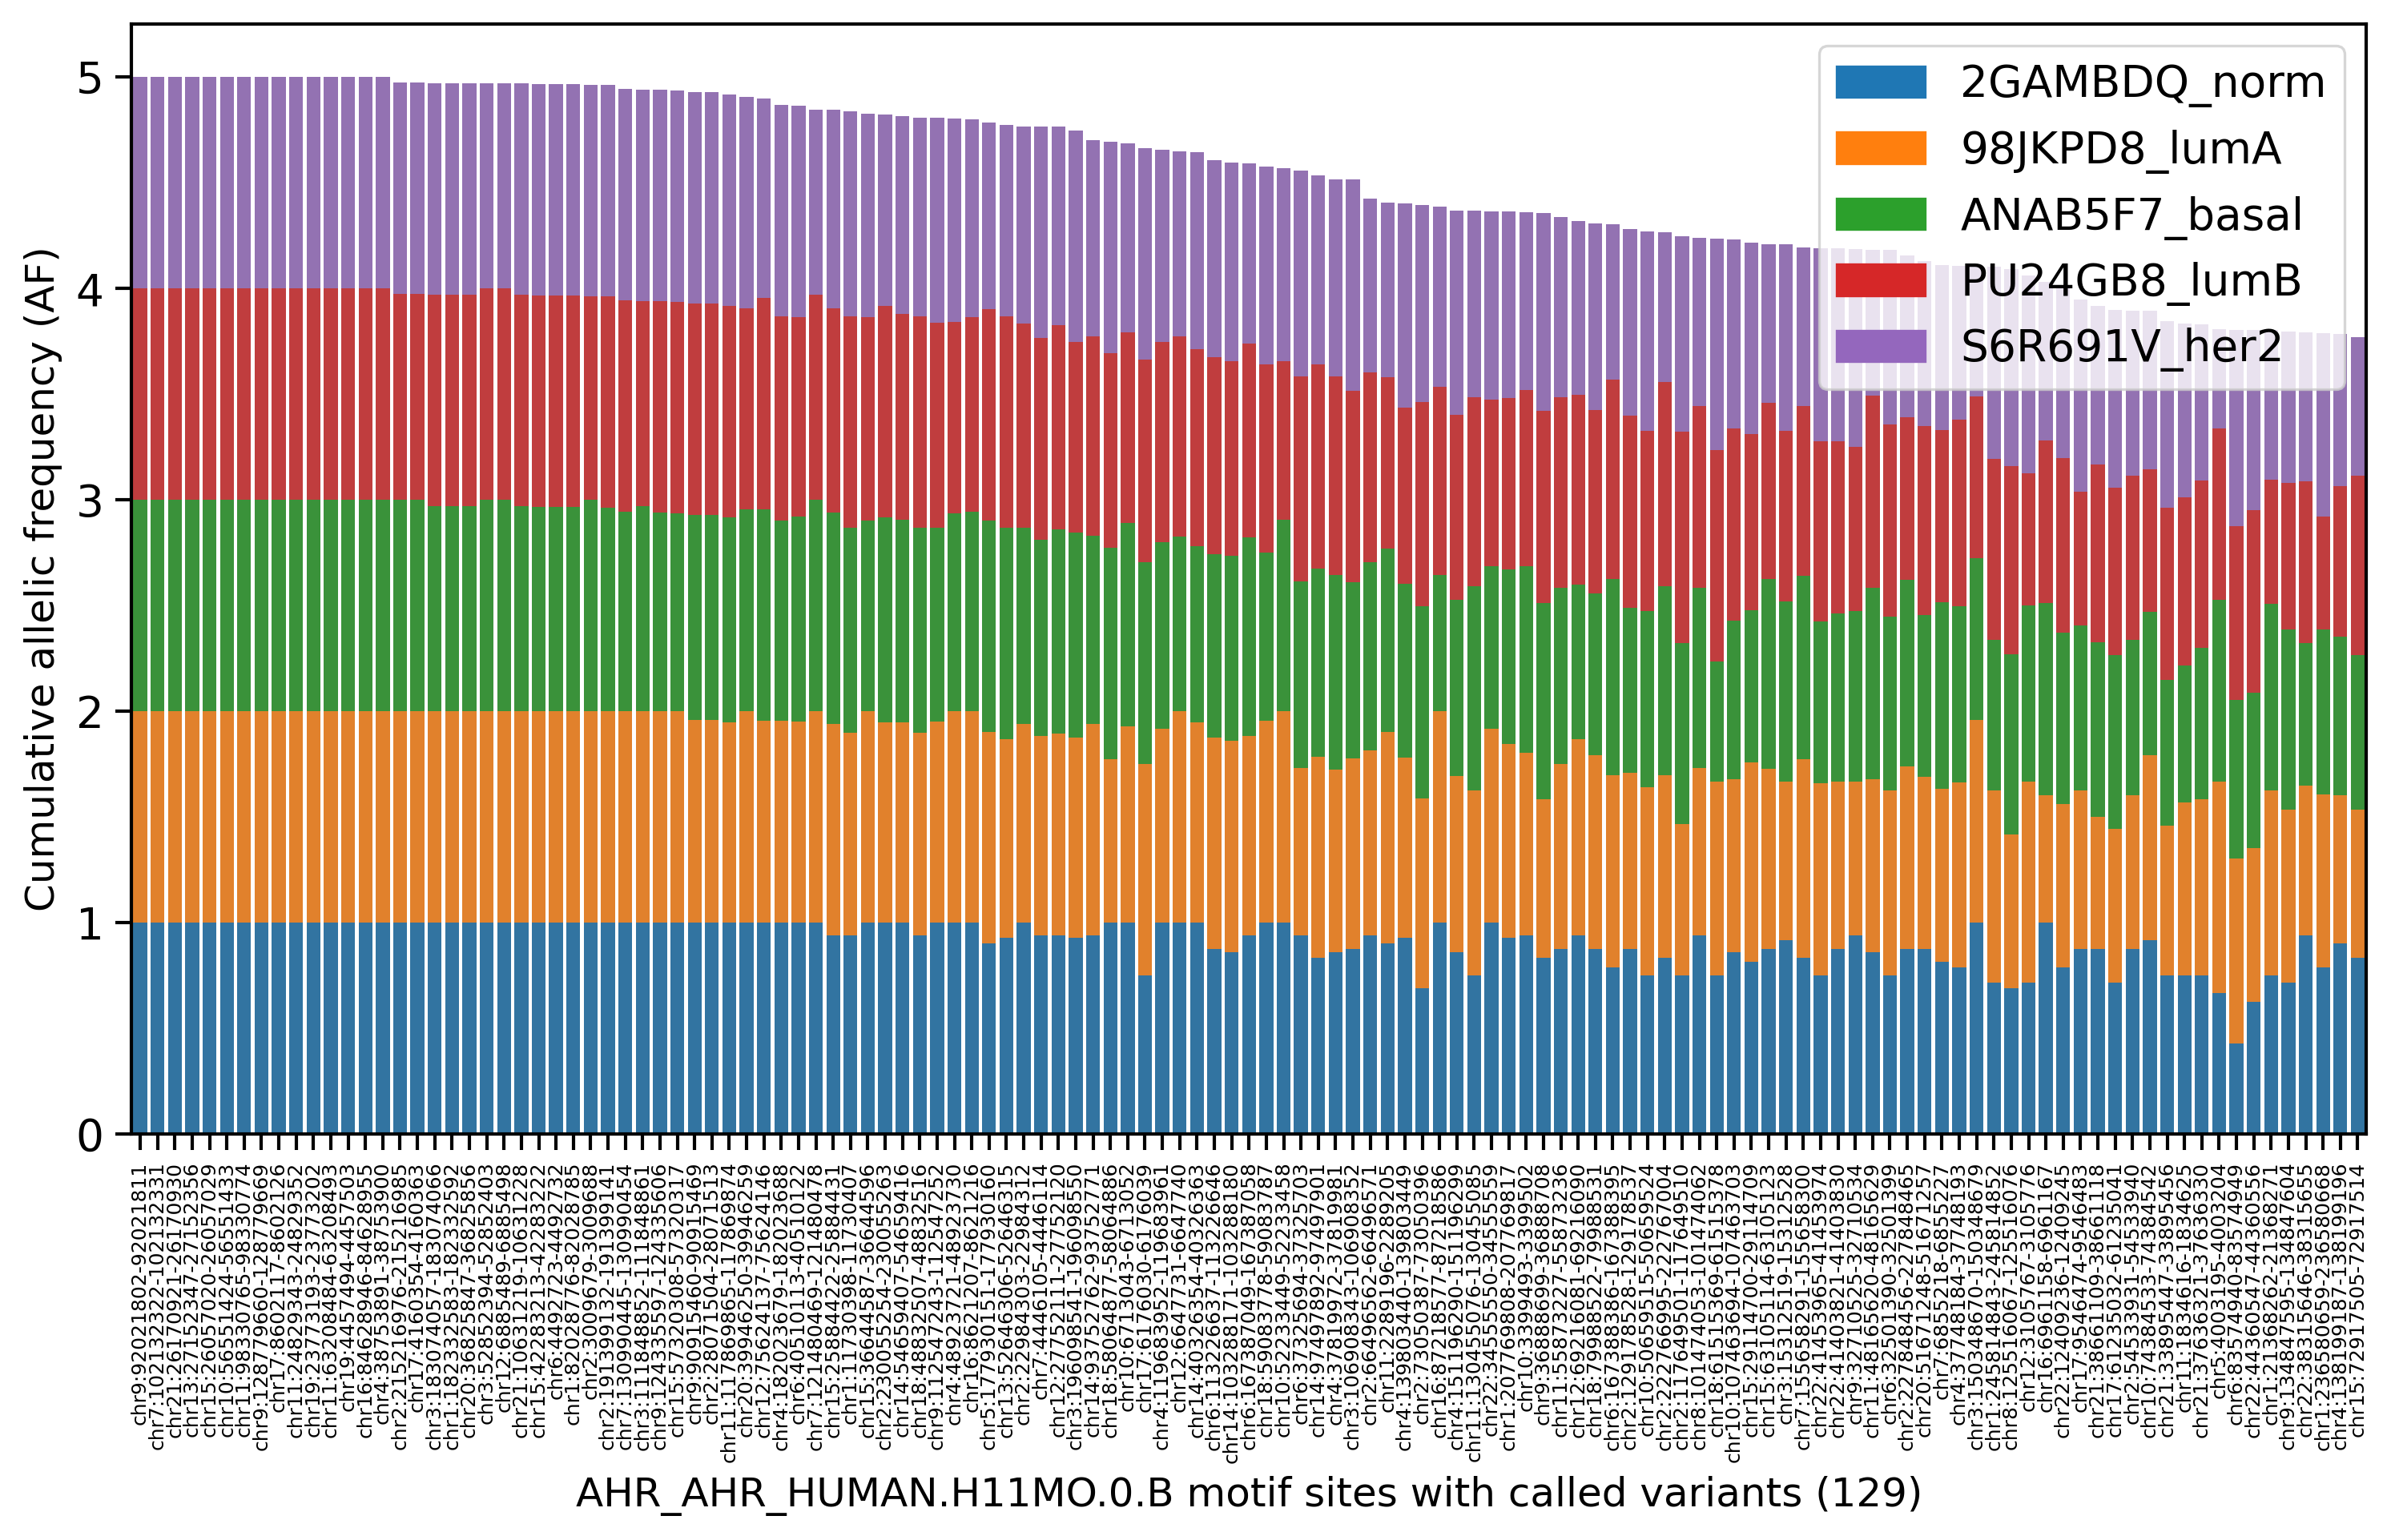

In [43]:
import matplotlib.patches as mpatches

# Get a list of unique 'sample_id' values
sample_ids = test_df['sample_id'].unique()

# plot the sorted stacked bar plot
plt.figure(figsize=(12,6), dpi=300)

# Initialize a zero array for the 'bottom' parameter of the bar plot
bottom = np.zeros(len(test_df['region_id'].unique()))

# For each 'sample_id'
for i, sample_id in enumerate(sample_ids):
    # Get the 'AF' values for this 'sample_id'
    data = test_df[test_df['sample_id'] == sample_id]

    # Create a bar plot for this 'sample_id', stacked on top of the previous one
    sns.barplot(data=data, x='region_id', y='AF', bottom=bottom, color=sns.color_palette()[i])

    # Update 'bottom' for the next 'sample_id'
    bottom += data['AF'].values

# Create a patch for each 'sample_id'
patches = [mpatches.Patch(color=sns.color_palette()[i], label=sample_id) for i, sample_id in enumerate(sample_ids)]

# Add the legend to the plot
plt.legend(handles=patches)

plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Cumulative allelic frequency (AF)', fontsize=12)
plt.xlabel(f'{motif_id} motif sites with called variants ({test_df['region_id'].nunique()})', fontsize=12) 
plt.savefig(f'/home/msazizan/hyperspace/gatk-workflow/plotting/graphs/test.png', dpi=300, bbox_inches='tight')

In [13]:
matrix_afps_regsorted

region_id      sample_id   AF      FPS
0      chr10:117537379-117537389   2GAMBDQ_norm  1.0  0.02423
1      chr10:117537379-117537389   98JKPD8_lumA  1.0  0.02195
2      chr10:117537379-117537389  ANAB5F7_basal  1.0  0.02075
3      chr10:117537379-117537389   PU24GB8_lumB  1.0  0.02306
4      chr10:117537379-117537389   S6R691V_her2  1.0  0.03269
...                          ...            ...  ...      ...
10920     chr5:81188837-81188847   2GAMBDQ_norm  0.0  0.01006
10921     chr5:81188837-81188847   98JKPD8_lumA  0.0  0.00943
10922     chr5:81188837-81188847  ANAB5F7_basal  0.0  0.00754
10923     chr5:81188837-81188847   PU24GB8_lumB  0.0  0.01154
10924     chr5:81188837-81188847   S6R691V_her2  0.0  0.00767

[10925 rows x 4 columns]

(-0.1, 1.1)

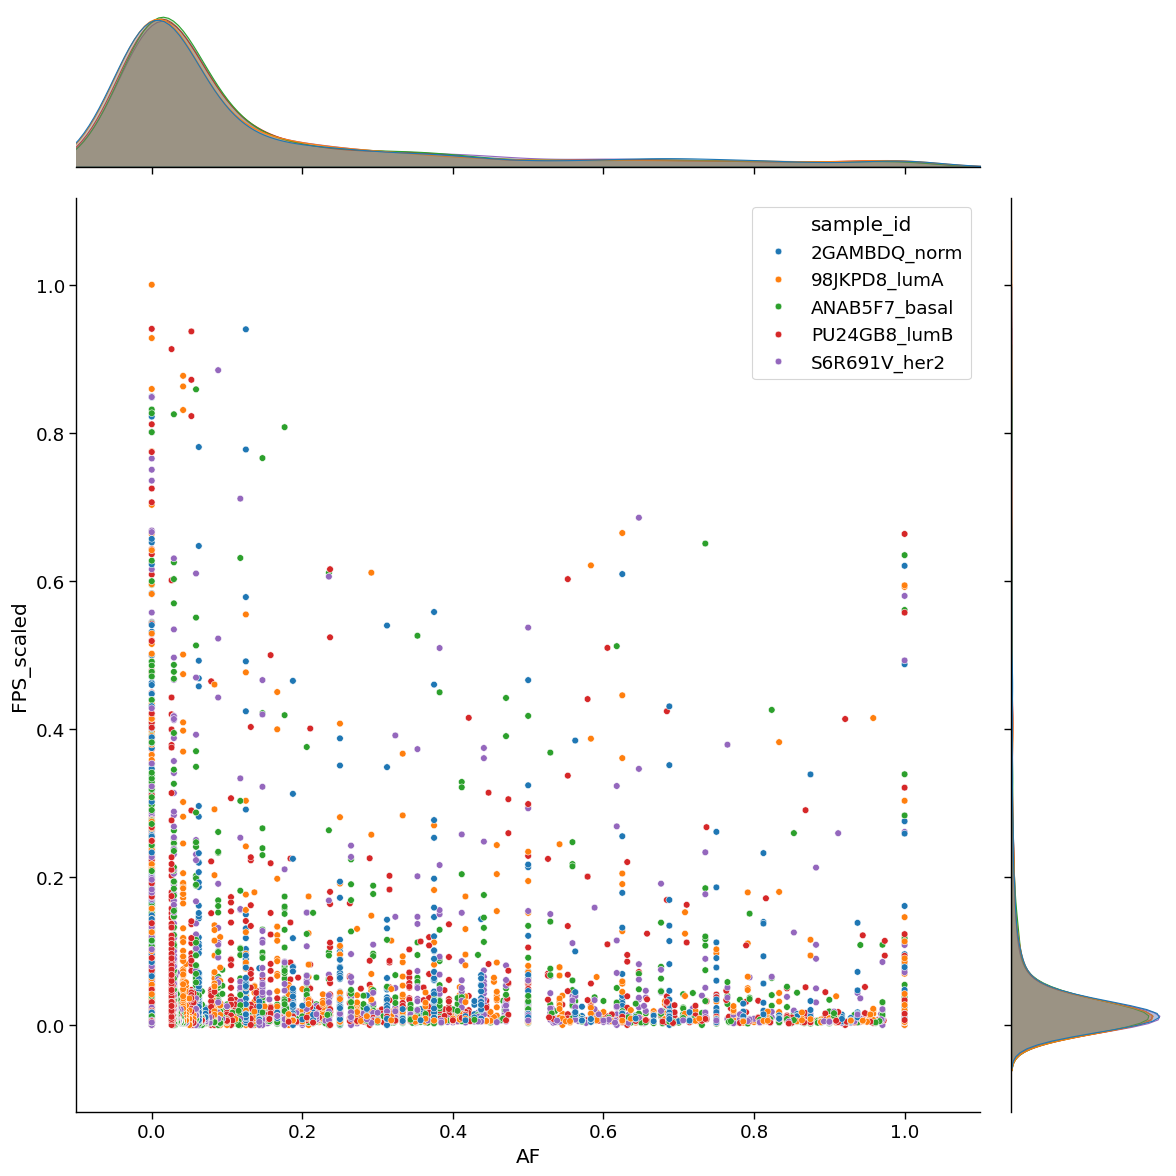

In [14]:
from sklearn.preprocessing import MinMaxScaler
# scale the AF and FPS values to a range of 0-1
# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the 'FPS' column and transform it
matrix_afps_regsorted['FPS_scaled'] = scaler.fit_transform(matrix_afps_regsorted[['FPS']])

# Create a jointplot of 'AF' and 'FPS'
sns.jointplot(data=matrix_afps_regsorted, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.xlim(-0.1, 1.1)

In [15]:
matrix_afps_regsorted.describe()

AF           FPS    FPS_scaled
count  10925.000000  10925.000000  10925.000000
mean       0.148782      0.094013      0.041402
std        0.249146      0.210717      0.092796
min        0.000000      0.000000      0.000000
25%        0.000000      0.014600      0.006430
50%        0.029412      0.025430      0.011199
75%        0.187500      0.066730      0.029387
max        1.000000      2.270760      1.000000

In [16]:
# filter out outliers using IQR method, but the inverse, where we retain the outliers and remove the inliers
# Calculate Q1, Q3 and IQR for the 'AF' column
Q1 = matrix_afps_regsorted['FPS_scaled'].quantile(0.25)
Q3 = matrix_afps_regsorted['FPS_scaled'].quantile(0.75)
# then filter the inliers
iqr_filtered_df = matrix_afps_regsorted[(matrix_afps_regsorted['AF'] > 0.5) & ((matrix_afps_regsorted['FPS_scaled'] <= Q1) | (matrix_afps_regsorted['FPS_scaled'] >= Q3))]
iqr_filtered_df

region_id      sample_id        AF      FPS  FPS_scaled
5     chr10:121481810-121481820   2GAMBDQ_norm  1.000000  0.01368    0.006024
6     chr10:121481810-121481820   98JKPD8_lumA  1.000000  0.00528    0.002325
7     chr10:121481810-121481820  ANAB5F7_basal  1.000000  0.00407    0.001792
8     chr10:121481810-121481820   PU24GB8_lumB  1.000000  0.00499    0.002198
9     chr10:121481810-121481820   S6R691V_her2  1.000000  0.00464    0.002043
...                         ...            ...       ...      ...         ...
2170    chr12:17082783-17082793   2GAMBDQ_norm  0.571429  0.01385    0.006099
2331      chr16:8812582-8812592   98JKPD8_lumA  0.555556  0.01184    0.005214
2409   chr9:124098227-124098237   S6R691V_her2  0.538462  0.01345    0.005923
2599    chr15:66140414-66140424   S6R691V_her2  0.615385  0.00708    0.003118
2876    chr19:21236237-21236247   98JKPD8_lumA  0.625000  0.01346    0.005928

[621 rows x 5 columns]

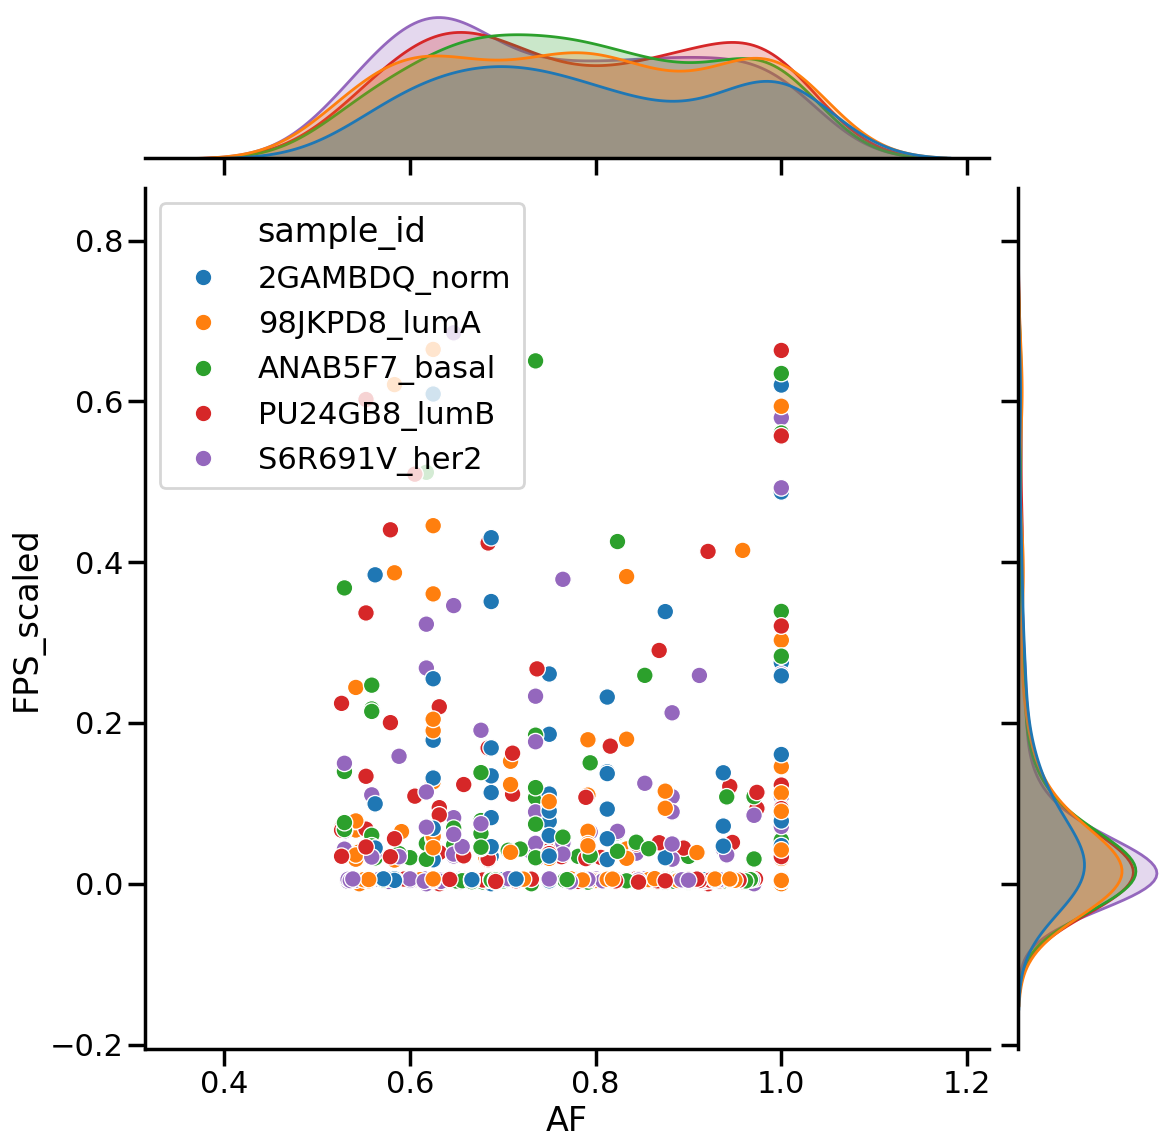

In [17]:
# plot jointplot of the filtered dataframe
sns.set_context("poster", rc={"figure.dpi": 300})
sns.jointplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', kind='scatter', hue='sample_id', height=12)
plt.show()

In [14]:
filtered_sites_df = iqr_filtered_df.groupby('sample_id', observed=True)['region_id'].nunique().reset_index()
filtered_sites_df['motif_id'] = motif_id
filtered_sites_df

sample_id  region_id                 motif_id
0   2GAMBDQ_norm        109  AHR_AHR_HUMAN.H11MO.0.B
1   98JKPD8_lumA        158  AHR_AHR_HUMAN.H11MO.0.B
2  ANAB5F7_basal        196  AHR_AHR_HUMAN.H11MO.0.B
3   PU24GB8_lumB        152  AHR_AHR_HUMAN.H11MO.0.B
4   S6R691V_her2        171  AHR_AHR_HUMAN.H11MO.0.B

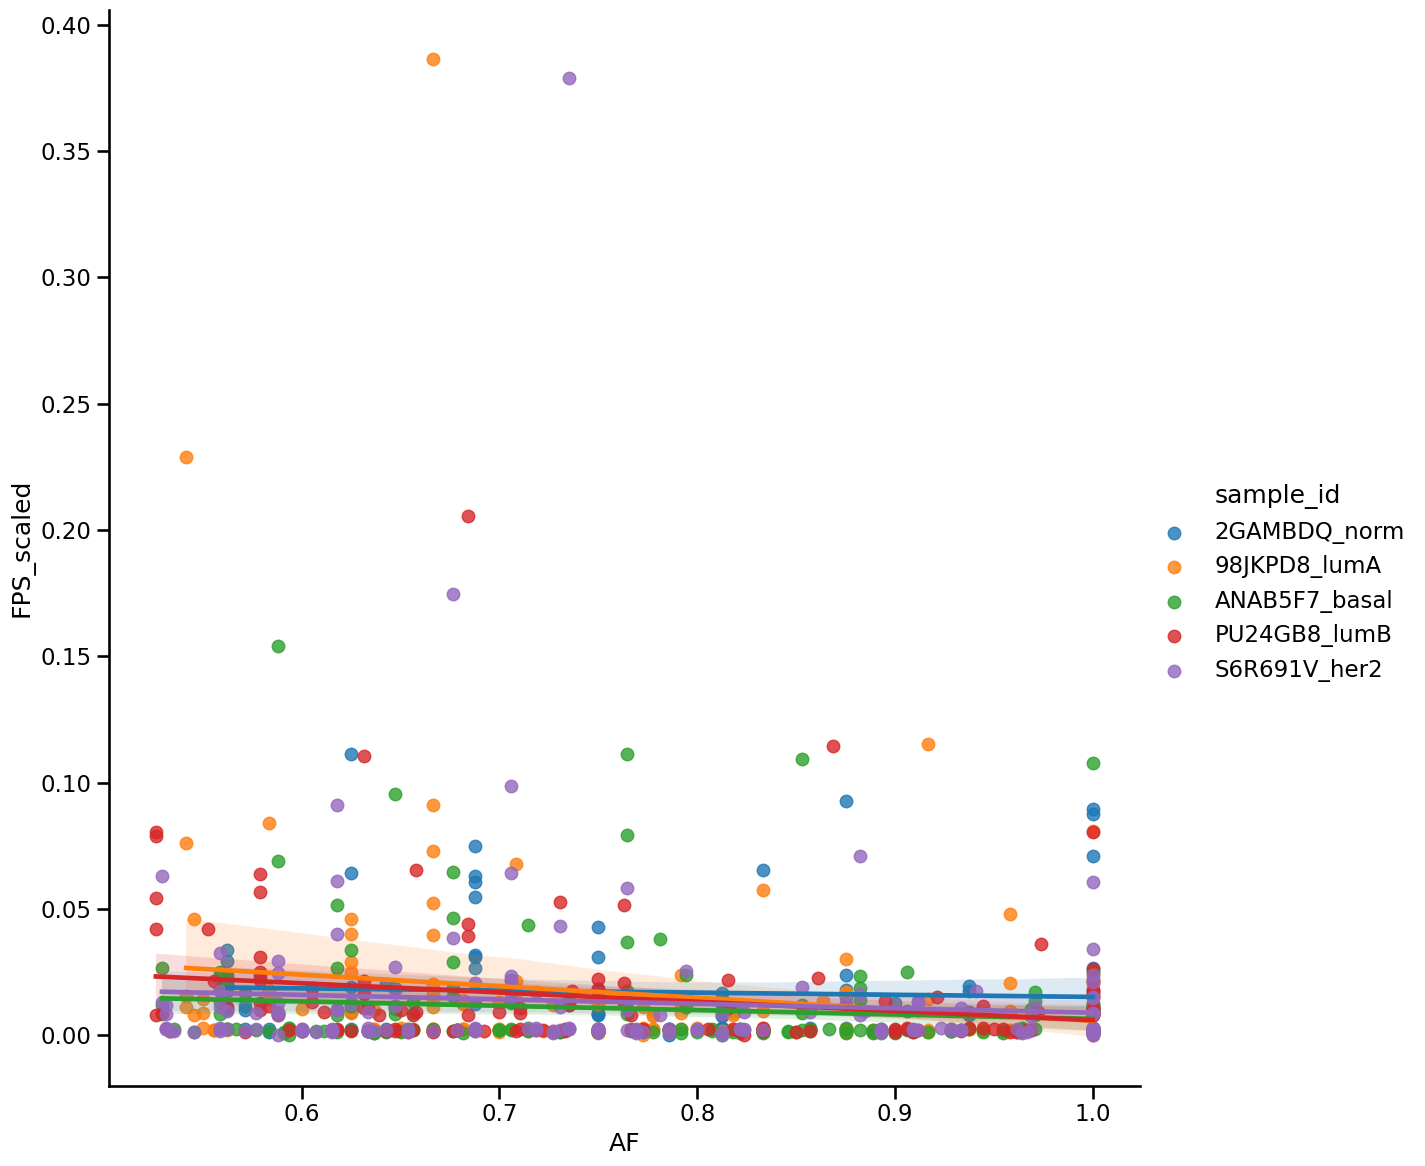

In [37]:
# add trendline to the jointplot
sns.set_context("talk", rc={"figure.dpi": 300})
sns.lmplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', hue='sample_id', height=12)
plt.show()

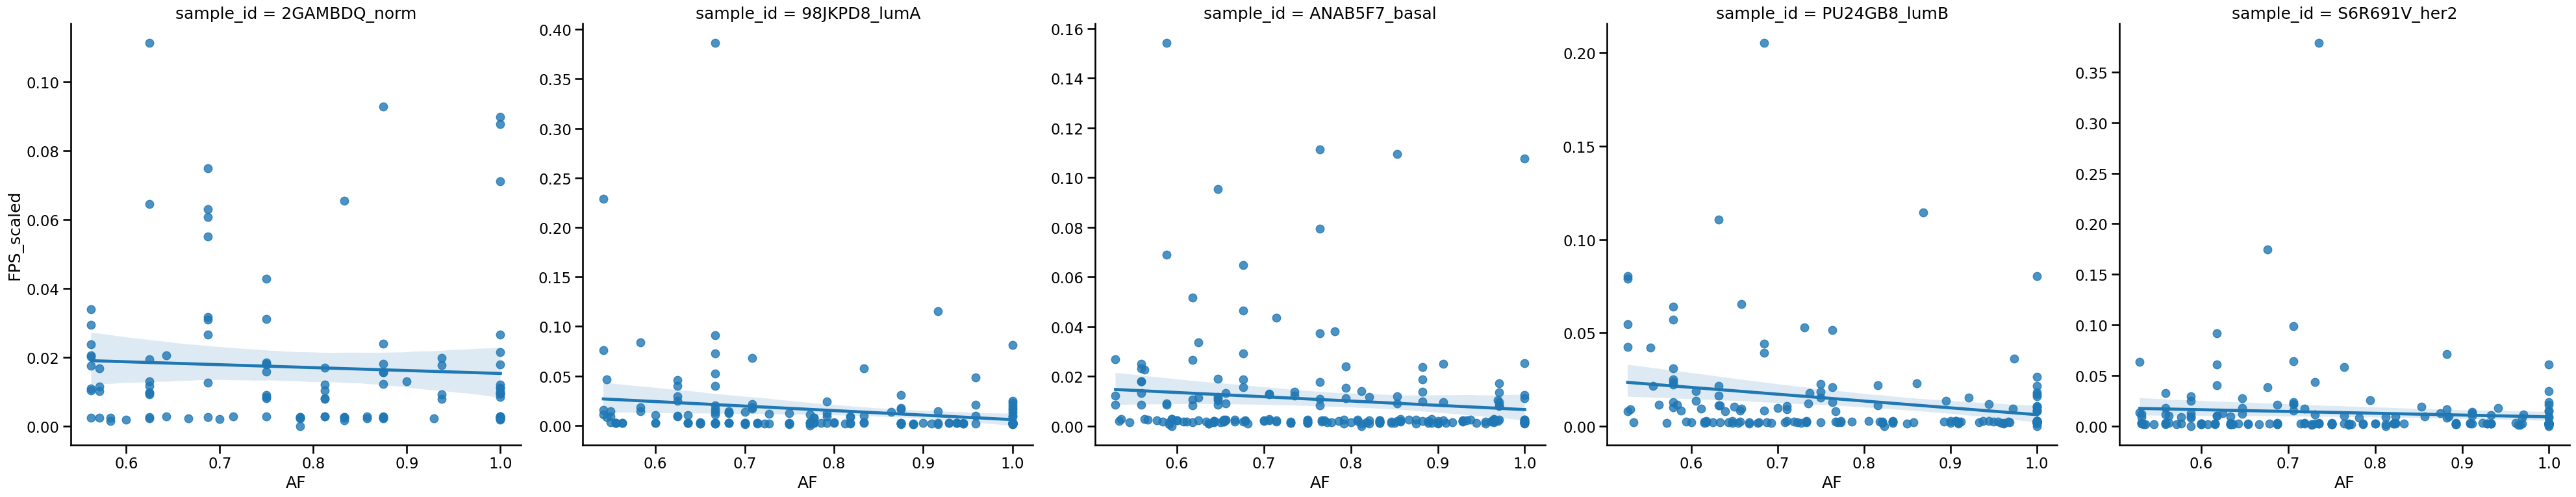

In [34]:
# add trendline to the jointplot
sns.set_context("talk", rc={"figure.dpi": 300})
sns.lmplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', col='sample_id', height=8, facet_kws=dict(sharex=False, sharey=False))
plt.show()

<Axes: xlabel='AF', ylabel='FPS_scaled'>

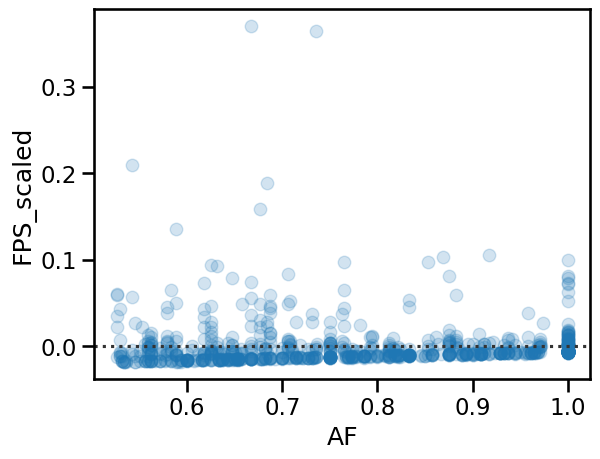

In [35]:
sns.residplot(data=iqr_filtered_df, x='AF', y='FPS_scaled', scatter_kws={'alpha': 0.2})

## ASIDE: Processing `bindetect` FC data

Below is a script to quickly load the bindetect results data into Python.

In [57]:
import os
directory = '/home/msazizan/hyperspace/gatk-workflow/plotting/raw_inputs/bindetect_results'
df_dict = {}
for file in os.listdir('/home/msazizan/hyperspace/gatk-workflow/plotting/raw_inputs/bindetect_results'):
	if file.endswith('_score.txt'):
		# extract contrast from filename
		contrast = os.path.basename(file).replace('_top_0.05_diff_motif_change_score.txt', '')
		if contrast == 'Basal_vs_Normal-like':
			contrast = 'Basal_vs_Normlike'
		# get full path to file
		file = os.path.join(directory, file)
		# read in fold change data
		fc_df = pd.read_csv(file, sep='\t')
		# rename the column
		cols = list(fc_df.columns)
		cols[1] = 'FC'
		fc_df.columns = cols
		# add contrast column
		fc_df['contrast'] = contrast
		# add df to the empty dictionary
		df_dict[contrast] = fc_df
		print(df_dict[contrast].head())
  
# Initialize merged_df as the first dataframe in the dictionary
merged_df = next(iter(df_dict.values()))

# Loop through the rest of the dataframes and merge them with merged_df
for contrast, df in list(df_dict.items())[1:]:
	merged_df = pd.concat([merged_df, df])

merged_df

                motif_id       FC        p-value           contrast
0     ZBTB14_M08387_2.00  0.34968  2.989080e-190  Basal_vs_Normlike
1  ZBT14_HUMAN.H11MO.0.C  0.32108  1.204400e-179  Basal_vs_Normlike
2         KLF15_MA1513.1  0.28392  1.060570e-215  Basal_vs_Normlike
3     ZNF777_M07703_2.00  0.28349  1.435920e-141  Basal_vs_Normlike
4   E2F2_HUMAN.H11MO.0.B  0.28281  7.325820e-171  Basal_vs_Normlike
                motif_id       FC        p-value       contrast
0      CEBPB_M07832_2.00  0.22694  1.369830e-178  Basal_vs_LumA
1      CEBPB_M07831_2.00  0.21001  5.887080e-179  Basal_vs_LumA
2       RELA_M08003_2.00  0.20919  5.849810e-185  Basal_vs_LumA
3       RELA_M08006_2.00  0.20874  2.687340e-183  Basal_vs_LumA
4  CEBPB_HUMAN.H11MO.0.A  0.20810  3.207110e-180  Basal_vs_LumA
                motif_id       FC        p-value       contrast
0  SOX10_HUMAN.H11MO.0.B  0.22090  4.653480e-191  Basal_vs_LumB
1       RELA_M08006_2.00  0.20951  2.381590e-183  Basal_vs_LumB
2   TF65_HUMAN.H

motif_id       FC        p-value           contrast
0      ZBTB14_M08387_2.00  0.34968  2.989080e-190  Basal_vs_Normlike
1   ZBT14_HUMAN.H11MO.0.C  0.32108  1.204400e-179  Basal_vs_Normlike
2          KLF15_MA1513.1  0.28392  1.060570e-215  Basal_vs_Normlike
3      ZNF777_M07703_2.00  0.28349  1.435920e-141  Basal_vs_Normlike
4    E2F2_HUMAN.H11MO.0.B  0.28281  7.325820e-171  Basal_vs_Normlike
..                    ...      ...            ...                ...
63     ZNF486_M07775_2.00  0.14160  4.426530e-162      Basal_vs_Her2
64  NFKB2_HUMAN.H11MO.0.B  0.13915  6.039760e-183      Basal_vs_Her2
65          NFIC_MA0161.2  0.13741  1.242360e-166      Basal_vs_Her2
66  CEBPE_HUMAN.H11MO.0.A  0.13712  2.735650e-147      Basal_vs_Her2
67     ZNF792_M07660_2.00  0.13426  1.611030e-183      Basal_vs_Her2

[272 rows x 4 columns]

In [58]:
# sort merged_df on motif_id
merged_df = merged_df.sort_values('motif_id')
merged_df

motif_id       FC        p-value           contrast
61       ATF3_M08188_2.00  0.12546  8.451810e-160      Basal_vs_LumB
42  CEBPA_HUMAN.H11MO.0.A  0.13299  7.822370e-169      Basal_vs_LumB
20  CEBPA_HUMAN.H11MO.0.A  0.18985  6.282790e-184      Basal_vs_LumA
38  CEBPA_HUMAN.H11MO.0.A  0.17737  3.517980e-181      Basal_vs_Her2
59      CEBPA_M08076_2.00  0.14772  4.270010e-167      Basal_vs_Her2
..                    ...      ...            ...                ...
33     ZNF846_M07707_2.00  0.22118  1.087400e-204  Basal_vs_Normlike
43     ZNF846_M07707_2.00  0.16760  9.129920e-193      Basal_vs_Her2
58     ZNF846_M07707_2.00  0.15603  1.115140e-189      Basal_vs_LumA
40         ZNF93_MA1721.1  0.21248  2.004350e-188  Basal_vs_Normlike
47         ZNF93_MA1721.1  0.16495  1.532830e-177      Basal_vs_Her2

[272 rows x 4 columns]

In [59]:
# filter for motif_id that appears in all possible contrast values
motifs_common = merged_df.groupby('motif_id')['contrast'].nunique().reset_index()
motifs_common

motif_id  contrast
0         ATF3_M08188_2.00         1
1    CEBPA_HUMAN.H11MO.0.A         3
2        CEBPA_M08076_2.00         1
3    CEBPB_HUMAN.H11MO.0.A         4
4        CEBPB_M07830_2.00         4
..                     ...       ...
116     ZNF777_M07703_2.00         4
117     ZNF783_M07757_2.00         2
118     ZNF792_M07660_2.00         2
119     ZNF846_M07707_2.00         3
120         ZNF93_MA1721.1         2

[121 rows x 2 columns]

In [61]:
# filter for contrast == 4
motifs_common = motifs_common[motifs_common['contrast'] == 4]
motifs_common.reset_index(drop=True, inplace=True)
print(len(motifs_common))
motifs_common


20


motif_id  contrast
0   CEBPB_HUMAN.H11MO.0.A         4
1       CEBPB_M07830_2.00         4
2       CEBPB_M07831_2.00         4
3       CEBPB_M07832_2.00         4
4   CEBPD_HUMAN.H11MO.0.C         4
5    E2F2_HUMAN.H11MO.0.B         4
6        E2F4_M07942_2.00         4
7        E2F4_M07943_2.00         4
8    E2F5_HUMAN.H11MO.0.B         4
9        RELA_M07999_2.00         4
10       RELA_M08003_2.00         4
11       RELA_M08006_2.00         4
12       RELA_M08007_2.00         4
13       RELA_M08008_2.00         4
14      TFDP1_M08108_2.00         4
15         TFDP1_MA1122.1         4
16  ZBT14_HUMAN.H11MO.0.C         4
17     ZBTB14_M08387_2.00         4
18      ZFP57_M07756_2.00         4
19     ZNF777_M07703_2.00         4

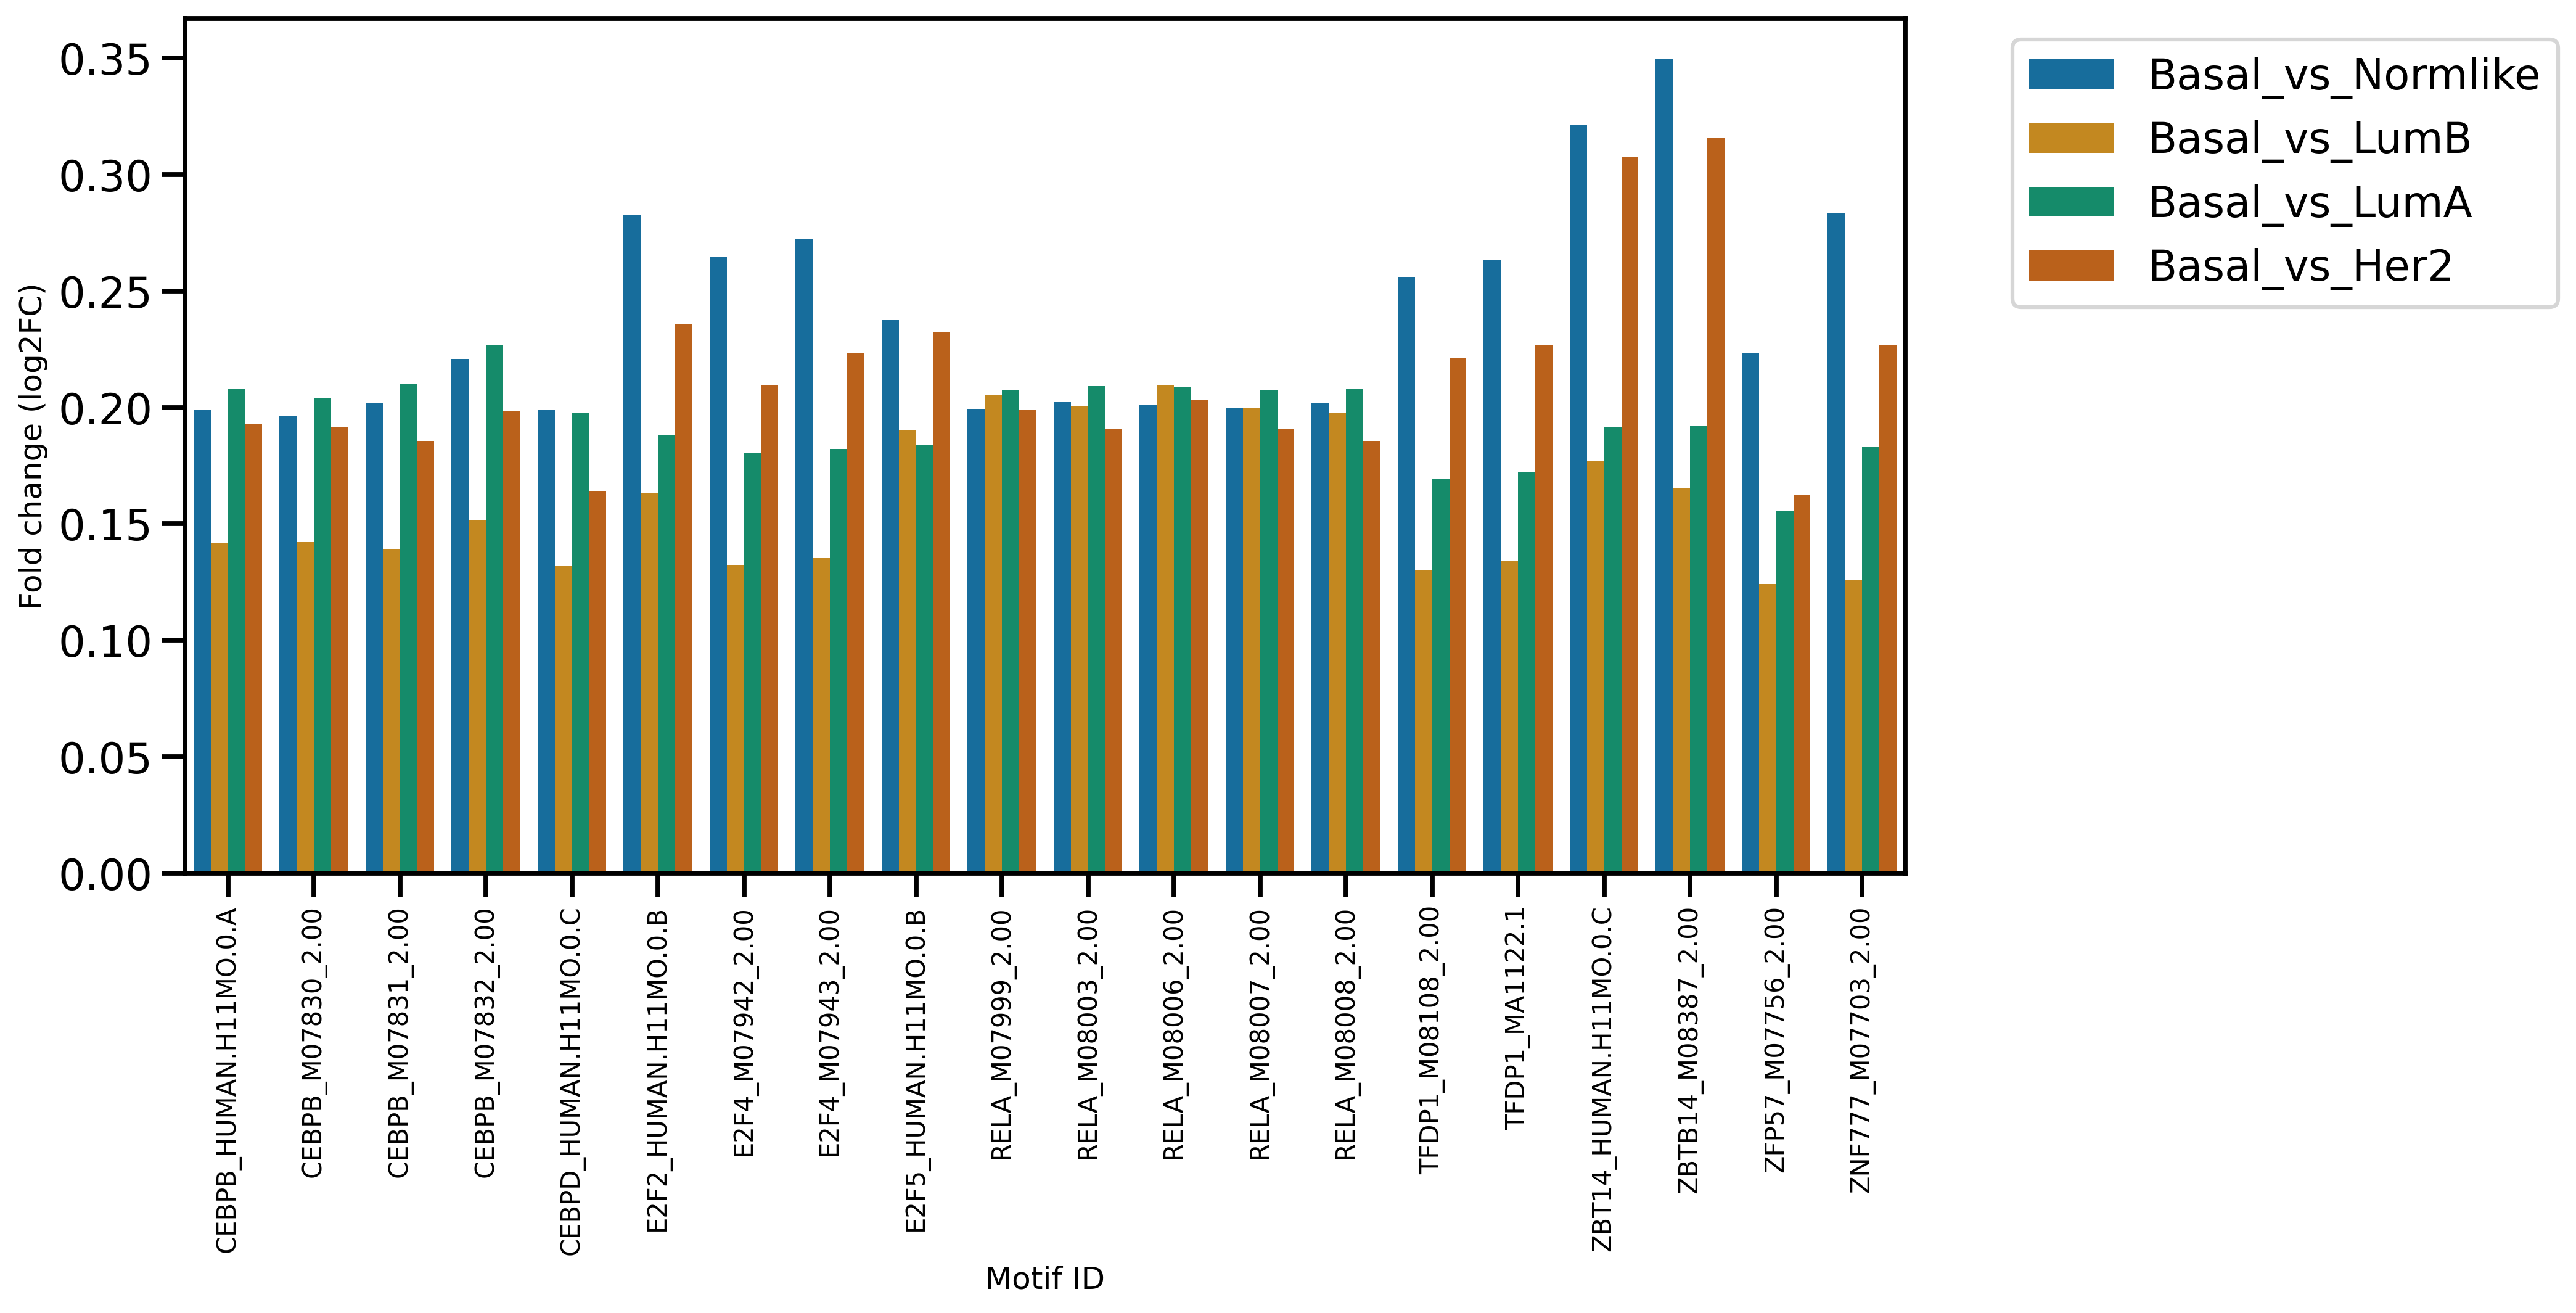

In [71]:
# plot FC values for each contrast
plt.figure(figsize=(12,6), dpi=300)
sns.barplot(data=merged_df[merged_df['motif_id'].isin(motifs_common['motif_id'])], x='motif_id', y='FC', hue='contrast', palette='colorblind')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Motif ID', fontsize=12)
plt.ylabel('Fold change (log2FC)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Calculating the Variance of the AF and FPS values 

It would be quite interesting to see if for each variant site per motif, the variance of the AF and FPS values are correlated.

I.e. if a variant site has a high variance in AF values, does it also have a high variance in FPS values?

In [55]:
matrix_afps

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.10260            0.12218           0.13921           0.12024   
1              0.09540            0.03670           0.09011           0.05082   
2              0.09749            0.09080           0.07864           0.10880   
3              0.11471            0.04786           0.11338           0.14384   
4              0.01792            0.04624           0.02729           0.01957   
...                ...                ...               ...               ...   
2180           0.00703            0.00985           0.00556           0.00611   
2181           0.01215            0.01187           0.01025           0.01366   
2182           0.02016            0.00831           0.02155           0.01655   
2183           0.00810            0.00633           0.00697           0.00629   
2184           0.34392            0.07363           0.35995           0.24735   

      2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
0              0.14062         0.000000         0.000000          0.000000   
1              0.05586         1.000000         1.000000          0.730769   
2              0.08458         0.062500         0.000000          0.000000   
3              0.15151         0.250000         0.181818          0.062500   
4              0.02657         0.071429         0.090909          0.062500   
...                ...              ...              ...               ...   
2180           0.00910         0.000000         0.000000          0.000000   
2181           0.01454         0.000000         0.050000          0.093750   
2182           0.02160         0.000000         0.000000          0.000000   
2183           0.01465         0.000000         0.000000          0.045455   
2184           0.20522         0.750000         0.500000          0.600000   

      PU24GB8_lumB_AF  S6R691V_her2_AF                 region_id  
0            0.027778         0.000000        chr1:905473-905483  
1            0.769231         0.730769        chr1:925405-925415  
2            0.000000         0.000000      chr1:1020750-1020760  
3            0.131579         0.147059      chr1:1130413-1130423  
4            0.078947         0.088235      chr1:1225277-1225287  
...               ...              ...                       ...  
2180         0.071429         0.000000  chrX:118300271-118300281  
2181         0.000000         0.062500  chrX:119211181-119211191  
2182         0.000000         0.066667  chrX:139342109-139342119  
2183         0.000000         0.000000  chrX:147508113-147508123  
2184         0.605263         0.588235  chrX:150849074-150849084  

[2185 rows x 11 columns]

In [88]:
matrix_afps_regsorted

region_id      sample_id   AF      FPS  FPS_scaled
0      chr10:117537379-117537389   2GAMBDQ_norm  1.0  0.02423    0.010670
1      chr10:117537379-117537389   98JKPD8_lumA  1.0  0.02195    0.009666
2      chr10:117537379-117537389  ANAB5F7_basal  1.0  0.02075    0.009138
3      chr10:117537379-117537389   PU24GB8_lumB  1.0  0.02306    0.010155
4      chr10:117537379-117537389   S6R691V_her2  1.0  0.03269    0.014396
...                          ...            ...  ...      ...         ...
10920     chr5:81188837-81188847   2GAMBDQ_norm  0.0  0.01006    0.004430
10921     chr5:81188837-81188847   98JKPD8_lumA  0.0  0.00943    0.004153
10922     chr5:81188837-81188847  ANAB5F7_basal  0.0  0.00754    0.003320
10923     chr5:81188837-81188847   PU24GB8_lumB  0.0  0.01154    0.005082
10924     chr5:81188837-81188847   S6R691V_her2  0.0  0.00767    0.003378

[10925 rows x 5 columns]

In [56]:
# extract fps columns
fps_df = matrix_afps.filter(regex='_fps$|_id$')
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.10260            0.12218           0.13921           0.12024   
1              0.09540            0.03670           0.09011           0.05082   
2              0.09749            0.09080           0.07864           0.10880   
3              0.11471            0.04786           0.11338           0.14384   
4              0.01792            0.04624           0.02729           0.01957   
...                ...                ...               ...               ...   
2180           0.00703            0.00985           0.00556           0.00611   
2181           0.01215            0.01187           0.01025           0.01366   
2182           0.02016            0.00831           0.02155           0.01655   
2183           0.00810            0.00633           0.00697           0.00629   
2184           0.34392            0.07363           0.35995           0.24735   

      2GAMBDQ_norm_fps                 region_id  
0              0.14062        chr1:905473-905483  
1              0.05586        chr1:925405-925415  
2              0.08458      chr1:1020750-1020760  
3              0.15151      chr1:1130413-1130423  
4              0.02657      chr1:1225277-1225287  
...                ...                       ...  
2180           0.00910  chrX:118300271-118300281  
2181           0.01454  chrX:119211181-119211191  
2182           0.02160  chrX:139342109-139342119  
2183           0.01465  chrX:147508113-147508123  
2184           0.20522  chrX:150849074-150849084  

[2185 rows x 6 columns]

In [57]:
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
region_id                                                       
chr1:905473-905483                 0.10260            0.12218   
chr1:925405-925415                 0.09540            0.03670   
chr1:1020750-1020760               0.09749            0.09080   
chr1:1130413-1130423               0.11471            0.04786   
chr1:1225277-1225287               0.01792            0.04624   
...                                    ...                ...   
chrX:118300271-118300281           0.00703            0.00985   
chrX:119211181-119211191           0.01215            0.01187   
chrX:139342109-139342119           0.02016            0.00831   
chrX:147508113-147508123           0.00810            0.00633   
chrX:150849074-150849084           0.34392            0.07363   

                          S6R691V_her2_fps  PU24GB8_lumB_fps  \
region_id                                                      
chr1:905473-905483                 0.13921           0.12024   
chr1:925405-925415                 0.09011           0.05082   
chr1:1020750-1020760               0.07864           0.10880   
chr1:1130413-1130423               0.11338           0.14384   
chr1:1225277-1225287               0.02729           0.01957   
...                                    ...               ...   
chrX:118300271-118300281           0.00556           0.00611   
chrX:119211181-119211191           0.01025           0.01366   
chrX:139342109-139342119           0.02155           0.01655   
chrX:147508113-147508123           0.00697           0.00629   
chrX:150849074-150849084           0.35995           0.24735   

                          2GAMBDQ_norm_fps   fps_var  
region_id                                             
chr1:905473-905483                 0.14062  0.000245  
chr1:925405-925415                 0.05586  0.000659  
chr1:1020750-1020760               0.08458  0.000137  
chr1:1130413-1130423               0.15151  0.001668  
chr1:1225277-1225287               0.02657  0.000127  
...                                    ...       ...  
chrX:118300271-118300281           0.00910  0.000003  
chrX:119211181-119211191           0.01454  0.000003  
chrX:139342109-139342119           0.02160  0.000031  
chrX:147508113-147508123           0.01465  0.000012  
chrX:150849074-150849084           0.20522  0.013487  

[2185 rows x 6 columns]

In [58]:
# subset for just the fps_var column
fps_var_df = fps_df[['fps_var']].reset_index()
fps_var_df

region_id   fps_var
0           chr1:905473-905483  0.000245
1           chr1:925405-925415  0.000659
2         chr1:1020750-1020760  0.000137
3         chr1:1130413-1130423  0.001668
4         chr1:1225277-1225287  0.000127
...                        ...       ...
2180  chrX:118300271-118300281  0.000003
2181  chrX:119211181-119211191  0.000003
2182  chrX:139342109-139342119  0.000031
2183  chrX:147508113-147508123  0.000012
2184  chrX:150849074-150849084  0.013487

[2185 rows x 2 columns]

In [ ]:
# sort the df by fps_var in descending order
fps_var_df = fps_var_df.sort_values(by='fps_var', ascending=False)

In [79]:
fps_var_df

fps_var
region_id                          
chr17:39209030-39209040    0.503177
chr17:68378875-68378885    0.124773
chr20:49046320-49046330    0.093997
chr1:204573389-204573399   0.080491
chr6:57961533-57961543     0.057213
...                             ...
chr14:106335014-106335024  0.000000
chr9:40105892-40105902     0.000000
chr5:557297-557307         0.000000
chrX:1380880-1380890       0.000000
chr4:49511750-49511760     0.000000

[2185 rows x 1 columns]

We can then find the AF variance per motif site.

In [90]:
af_df = matrix_afps.filter(regex='_AF$|_id$')
af_df = af_df.set_index('region_id')
af_df['af_var'] = af_df.var(axis=1)
af_df

2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
region_id                                                                      
chr1:905473-905483               0.000000         0.000000          0.000000   
chr1:925405-925415               1.000000         1.000000          0.730769   
chr1:1020750-1020760             0.062500         0.000000          0.000000   
chr1:1130413-1130423             0.250000         0.181818          0.062500   
chr1:1225277-1225287             0.071429         0.090909          0.062500   
...                                   ...              ...               ...   
chrX:118300271-118300281         0.000000         0.000000          0.000000   
chrX:119211181-119211191         0.000000         0.050000          0.093750   
chrX:139342109-139342119         0.000000         0.000000          0.000000   
chrX:147508113-147508123         0.000000         0.000000          0.045455   
chrX:150849074-150849084         0.750000         0.500000          0.600000   

                          PU24GB8_lumB_AF  S6R691V_her2_AF    af_var  
region_id                                                             
chr1:905473-905483               0.027778         0.000000  0.000154  
chr1:925405-925415               0.769231         0.730769  0.019970  
chr1:1020750-1020760             0.000000         0.000000  0.000781  
chr1:1130413-1130423             0.131579         0.147059  0.004728  
chr1:1225277-1225287             0.078947         0.088235  0.000139  
...                                   ...              ...       ...  
chrX:118300271-118300281         0.071429         0.000000  0.001020  
chrX:119211181-119211191         0.000000         0.062500  0.001672  
chrX:139342109-139342119         0.000000         0.066667  0.000889  
chrX:147508113-147508123         0.000000         0.000000  0.000413  
chrX:150849074-150849084         0.605263         0.588235  0.008072  

[2185 rows x 6 columns]

In [77]:
# extract AF and region_id columns, groupby region_id and calculate AF variance across sample_id per region_id
af_var_df = matrix_afps_regsorted[['region_id', 'AF']].groupby('region_id', observed=False).var().reset_index().rename(columns={'AF': 'af_var'})
af_var_df

region_id  af_var
0     chr10:117537379-117537389     0.0
1     chr10:121481810-121481820     0.0
2       chr18:24543887-24543897     0.0
3       chr13:75393456-75393466     0.0
4       chr16:10308906-10308916     0.0
...                         ...     ...
2180    chr20:29320400-29320410     0.0
2181    chr20:49046320-49046330     0.0
2182    chr14:23321300-23321310     0.0
2183       chr5:7016076-7016086     0.0
2184     chr5:81188837-81188847     0.0

[2185 rows x 2 columns]

In [78]:
# set the index to 'region_id' and then sort variance of AF values in descending order
af_var_df_sorted = af_var_df.sort_values(by='af_var', ascending=False)
af_var_df_sorted = af_var_df_sorted.set_index('region_id')
af_var_df_sorted


af_var
region_id                         
chr7:143810798-143810808  0.200000
chr6:157492441-157492451  0.112277
chr8:90321728-90321738    0.106519
chr3:138338357-138338367  0.093564
chr1:239368197-239368207  0.086266
...                            ...
chr7:65269361-65269371    0.000000
chr7:72829622-72829632    0.000000
chr8:80301034-80301044    0.000000
chr8:8942538-8942548      0.000000
chr1:209784785-209784795  0.000000

[2185 rows x 1 columns]

In [126]:
# merged sorted fps_var_df and af_var_df on region_id index
variance_df = pd.merge(fps_var_df, af_var_df_sorted, left_index=True, right_index=True)
variance_df


fps_var    af_var
region_id                                    
chr17:39209030-39209040    0.503177  0.000347
chr17:68378875-68378885    0.124773  0.000692
chr20:49046320-49046330    0.093997  0.000000
chr1:204573389-204573399   0.080491  0.011758
chr6:57961533-57961543     0.057213  0.000000
...                             ...       ...
chr14:106335014-106335024  0.000000  0.000781
chr9:40105892-40105902     0.000000  0.010339
chr5:557297-557307         0.000000  0.000500
chrX:1380880-1380890       0.000000  0.000139
chr4:49511750-49511760     0.000000  0.000781

[2185 rows x 2 columns]

In [145]:
filepath = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/ASCL1_M08055_2.00_fpscore-af-varsites-combined-matrix-wide.tsv'
motif_id = os.path.basename(filepath).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
# print message
print(f'Processing {motif_id}...')

# load data file
matrix_df = pd.read_csv(filepath, sep='\t')
# filter df
fps_df = matrix_df.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
# subset the dataframe to just the 'fps_var' column and reset the index
fps_var_df = fps_df[['fps_var']].reset_index()
# sort the df by fps_var in descending order
fps_var_df = fps_var_df.sort_values(by='fps_var', ascending=False)
	
af_df = matrix_df.filter(regex='_AF$|_id$')
af_df = af_df.set_index('region_id')
af_df['af_var'] = af_df.var(axis=1)
af_var_df = af_df[['af_var']].reset_index()
af_var_df = af_var_df.sort_values(by='af_var', ascending=False)
af_var_df = af_var_df.set_index('region_id')
af_var_df
# merged sorted fps_var_df and af_var_df on region_id index
variance_df = pd.merge(af_var_df, fps_var_df, left_index=True, right_on='region_id', how = 'outer')
# rearrange columns
variance_df = variance_df[['region_id', 'af_var', 'fps_var']]
variance_df

Processing ASCL1_M08055_2.00...


region_id  af_var   fps_var
1306   chr1:193723628-193723641     0.3  0.000007
9732     chr9:38916201-38916214     0.3  0.000000
19488  chrX:138711348-138711361     0.3  0.000071
9285   chr8:127317230-127317243     0.3  0.000018
11538   chr11:18120820-18120833     0.3  0.000007
...                         ...     ...       ...
15008   chr16:11797251-11797264     0.0  0.007277
14999   chr16:11460014-11460027     0.0  0.000020
18232   chr20:62318621-62318634     0.0  0.000039
18228   chr20:62164284-62164297     0.0  0.000063
4357   chr3:193858099-193858112     0.0  0.000217

[19555 rows x 3 columns]

In [127]:
# compute covariance between AF and FPS variance
variance_df.cov()

fps_var    af_var
fps_var  0.000149 -0.000005
af_var  -0.000005  0.000158

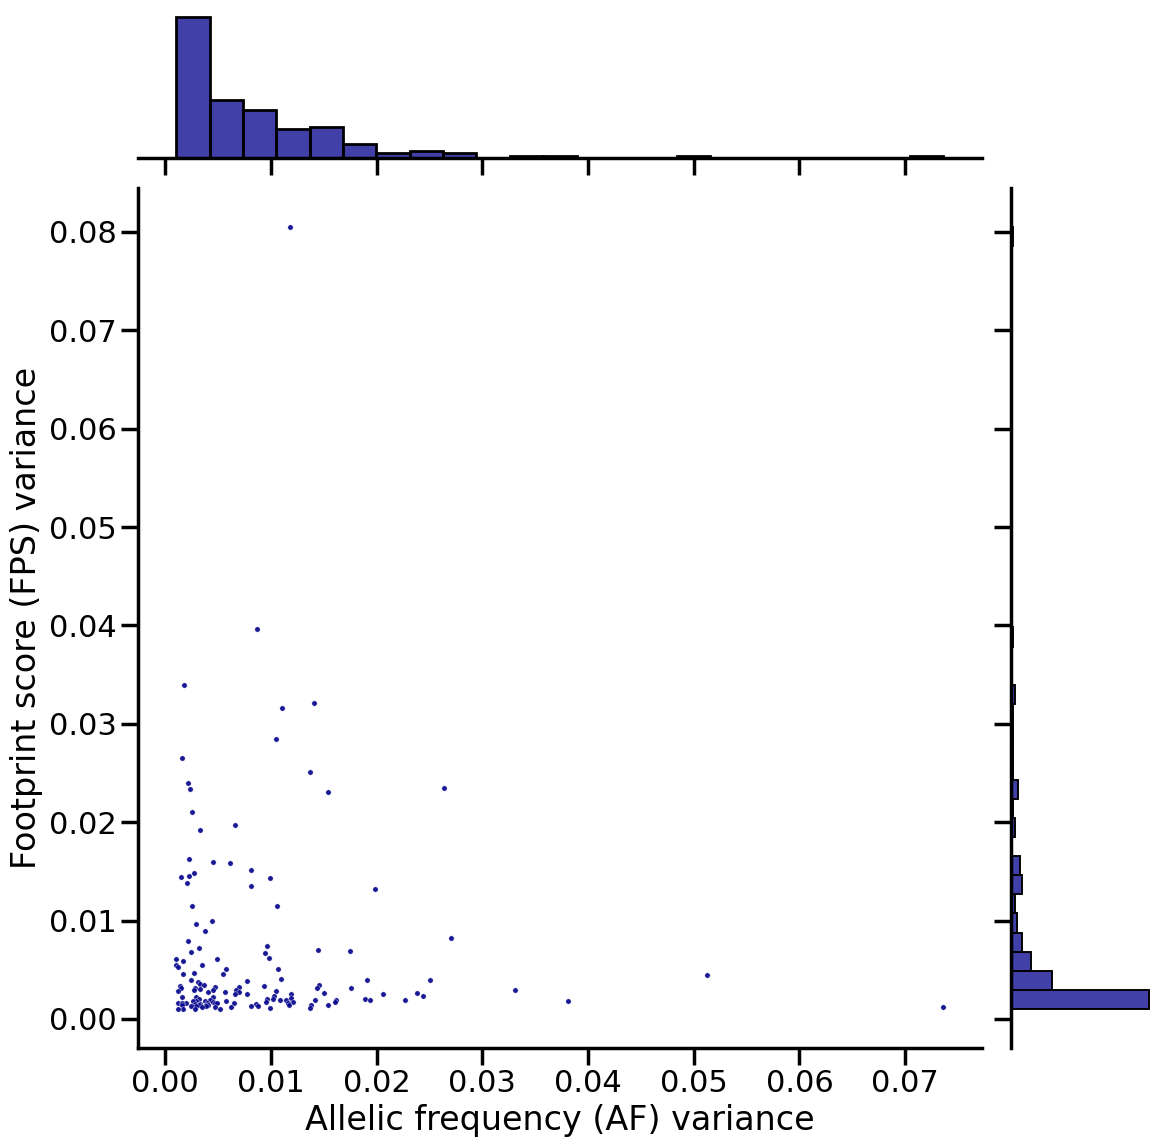

In [118]:
# plot scatterplot of AF variance vs FPS variance
sns.set_context("poster", rc={"figure.dpi": 300})
sns.jointplot(data=variance_df[(variance_df['af_var'] > 0.001) & (variance_df['fps_var'] > 0.001)], x='af_var', y='fps_var', height=12, s=15, alpha=0.9, color='darkblue')
plt.xlabel('Allelic frequency (AF) variance')
plt.ylabel('Footprint score (FPS) variance')
plt.show()


### Alternative approach

Instead of comparing the variance of footprint scores across subtypes per motif site with the variance of AF, we can compare the variance of the footprint scores across subtypes with the raw AF values.

In [60]:
# first extract AF columns from the matrix
af_df = matrix_afps.filter(regex='_AF$|_id$').copy()
af_df

2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  PU24GB8_lumB_AF  \
0            0.000000         0.000000          0.000000         0.027778   
1            1.000000         1.000000          0.730769         0.769231   
2            0.062500         0.000000          0.000000         0.000000   
3            0.250000         0.181818          0.062500         0.131579   
4            0.071429         0.090909          0.062500         0.078947   
...               ...              ...               ...              ...   
2180         0.000000         0.000000          0.000000         0.071429   
2181         0.000000         0.050000          0.093750         0.000000   
2182         0.000000         0.000000          0.000000         0.000000   
2183         0.000000         0.000000          0.045455         0.000000   
2184         0.750000         0.500000          0.600000         0.605263   

      S6R691V_her2_AF                 region_id  
0            0.000000        chr1:905473-905483  
1            0.730769        chr1:925405-925415  
2            0.000000      chr1:1020750-1020760  
3            0.147059      chr1:1130413-1130423  
4            0.088235      chr1:1225277-1225287  
...               ...                       ...  
2180         0.000000  chrX:118300271-118300281  
2181         0.062500  chrX:119211181-119211191  
2182         0.066667  chrX:139342109-139342119  
2183         0.000000  chrX:147508113-147508123  
2184         0.588235  chrX:150849074-150849084  

[2185 rows x 6 columns]

Then melt the AF dataframe into long format.

In [62]:
# convert to long format
af_df_long = af_df.melt(id_vars=["region_id"], var_name="variable", value_name="value")


# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
af_df_long[['sample_id', 'type']] = af_df_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
af_df_long = af_df_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
af_df_lpv = af_df_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name
af_df_lpv = af_df_lpv.rename_axis(None, axis=1)

# sort the dataframe by region_id naturally
af_df_lpv = af_df_lpv.reindex(index=index_natsorted(af_df_lpv['region_id']))
af_df_lpv = af_df_lpv.reset_index(drop=True)
af_df_lpv

region_id      sample_id        AF
0            chr1:905473-905483   2GAMBDQ_norm  0.000000
1            chr1:905473-905483   98JKPD8_lumA  0.000000
2            chr1:905473-905483  ANAB5F7_basal  0.000000
3            chr1:905473-905483   PU24GB8_lumB  0.027778
4            chr1:905473-905483   S6R691V_her2  0.000000
...                         ...            ...       ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263
10924  chrX:150849074-150849084   S6R691V_her2  0.588235

[10925 rows x 3 columns]

In [63]:
# Set index to 'region_id'
fps_var_df = fps_var_df.set_index('region_id')
fps_var_df

fps_var
region_id                          
chr17:39209030-39209040    0.503177
chr17:68378875-68378885    0.124773
chr20:49046320-49046330    0.093997
chr1:204573389-204573399   0.080491
chr6:57961533-57961543     0.057213
...                             ...
chr14:106335014-106335024  0.000000
chr9:40105892-40105902     0.000000
chr5:557297-557307         0.000000
chrX:1380880-1380890       0.000000
chr4:49511750-49511760     0.000000

[2185 rows x 1 columns]

In [66]:
fps_var_df.loc['chr1:905473-905483']

fps_var    0.000245
Name: chr1:905473-905483, dtype: float64

In [120]:
# merge af_df_sorted_lpv and fps_var_df on region_id index
merged_df = pd.merge(fps_var_df, af_df_lpv, right_on='region_id', left_index=True, how='outer')
merged_df

fps_var                region_id      sample_id        AF
8915  0.503177  chr17:39209030-39209040   2GAMBDQ_norm  0.000000
8916  0.503177  chr17:39209030-39209040   98JKPD8_lumA  0.041667
8917  0.503177  chr17:39209030-39209040  ANAB5F7_basal  0.000000
8918  0.503177  chr17:39209030-39209040   PU24GB8_lumB  0.000000
8919  0.503177  chr17:39209030-39209040   S6R691V_her2  0.000000
...        ...                      ...            ...       ...
2725  0.000000   chr4:49511750-49511760   2GAMBDQ_norm  0.062500
2726  0.000000   chr4:49511750-49511760   98JKPD8_lumA  0.000000
2727  0.000000   chr4:49511750-49511760  ANAB5F7_basal  0.000000
2728  0.000000   chr4:49511750-49511760   PU24GB8_lumB  0.000000
2729  0.000000   chr4:49511750-49511760   S6R691V_her2  0.000000

[10925 rows x 4 columns]

In [121]:
# reposition region_id column to the first column, sample_id to the second column and fps_var to the third column
cols = list(merged_df.columns)
cols.insert(0, cols.pop(cols.index('region_id')))
cols.insert(1, cols.pop(cols.index('sample_id')))
cols.insert(2, cols.pop(cols.index('fps_var')))
merged_df = merged_df.loc[:, cols]
merged_df

region_id      sample_id   fps_var        AF
8915  chr17:39209030-39209040   2GAMBDQ_norm  0.503177  0.000000
8916  chr17:39209030-39209040   98JKPD8_lumA  0.503177  0.041667
8917  chr17:39209030-39209040  ANAB5F7_basal  0.503177  0.000000
8918  chr17:39209030-39209040   PU24GB8_lumB  0.503177  0.000000
8919  chr17:39209030-39209040   S6R691V_her2  0.503177  0.000000
...                       ...            ...       ...       ...
2725   chr4:49511750-49511760   2GAMBDQ_norm  0.000000  0.062500
2726   chr4:49511750-49511760   98JKPD8_lumA  0.000000  0.000000
2727   chr4:49511750-49511760  ANAB5F7_basal  0.000000  0.000000
2728   chr4:49511750-49511760   PU24GB8_lumB  0.000000  0.000000
2729   chr4:49511750-49511760   S6R691V_her2  0.000000  0.000000

[10925 rows x 4 columns]

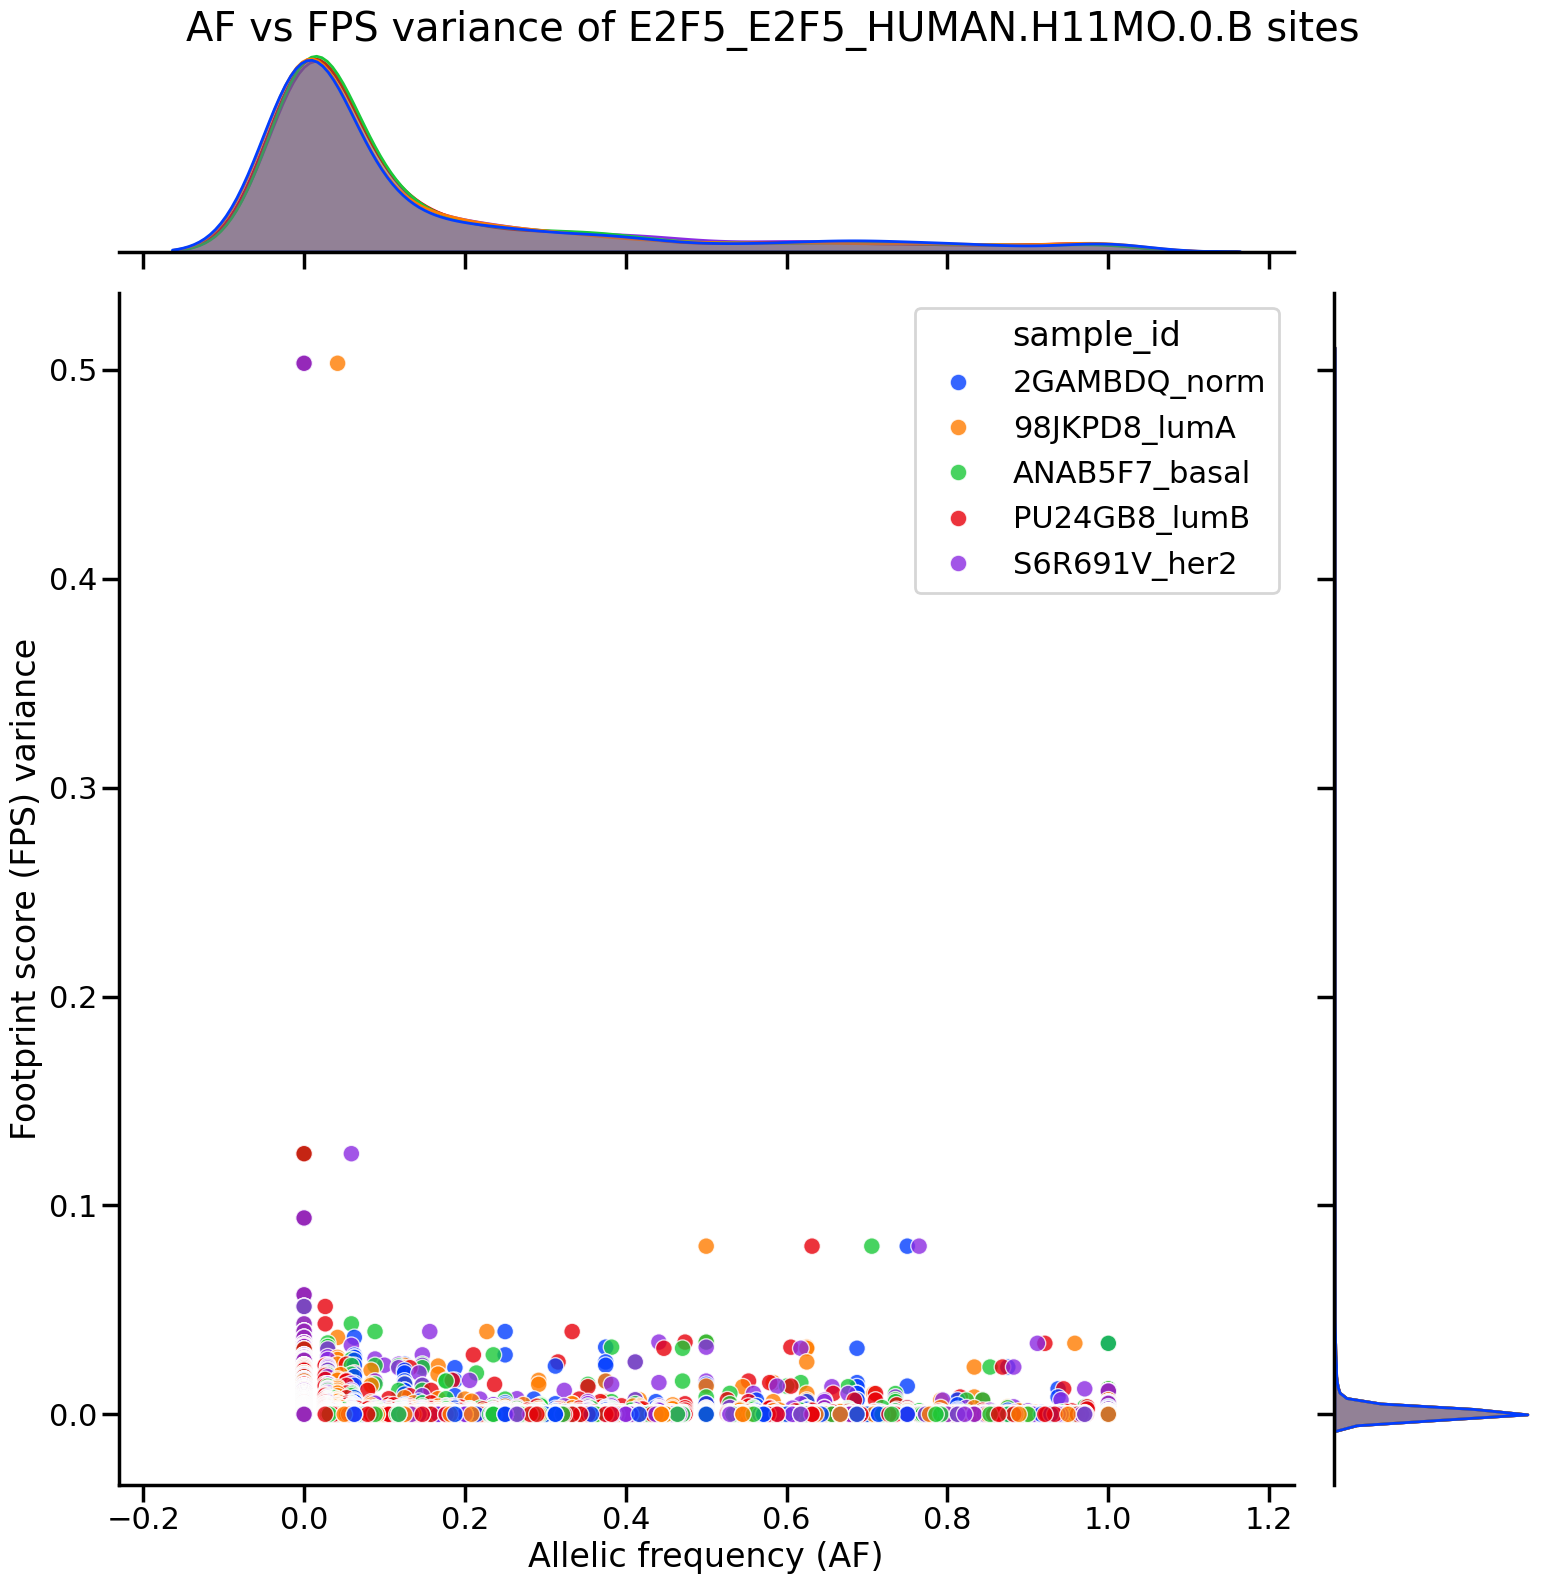

In [137]:
# plot scatterplot of AF vs FPS variance
# variance_df['color'] = (variance_df['af_var'] != 0) & (variance_df['fps_var'] != 0)
sns.set_context("poster", rc={"figure.dpi": 300})
g = sns.jointplot(data=merged_df, x='AF', y='fps_var', hue='sample_id', palette='bright', height=16, alpha=0.8)
# get handles and labels from jointplot
# handles, labels = g.ax_joint.get_legend_handles_labels()

# remove the original legend
# g.ax_joint.legend_.remove()

# move legend outside of plot
# g.fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='center right', fontsize=12)
plt.xlabel('Allelic frequency (AF)')
plt.ylabel('Footprint score (FPS) variance')
g.fig.suptitle(f'AF vs FPS variance of {motif_id} sites', y=1)
plt.show()

Now, reorder the longform AF dataframe based on the sorted FPS_variance `region_id` index.

In [ ]:
# # Create a categorical variable with ordered categories
# af_df['region_id'] = pd.Categorical(af_df['region_id'], categories=fps_var_df.index.unique(), ordered=True)

# # Sort by the categorical 'region_id'
# af_df_sorted = af_df.sort_values('region_id').reset_index(drop=True)

# af_df_sorted = af_df_sorted.set_index('region_id')
# af_df_sorted

In [29]:
# compute correlation between AF and FPS variance
variance_df.drop(columns=['color']).corr()

fps_var    af_var
fps_var  1.000000 -0.014751
af_var  -0.014751  1.000000

In [30]:
# compute covariance between AF and FPS variance
variance_df.drop(columns=['color']).cov()

fps_var    af_var
fps_var  0.000337 -0.000004
af_var  -0.000004  0.000246

In [147]:
varsites = pd.read_csv('/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_varsite_counts/1360-motifs-combined-IQR-filtered-varsite-counts.tsv', sep='\t')

varsites

sample_id  unique_sites                 motif_id
0      2GAMBDQ_norm           109  AHR_AHR_HUMAN.H11MO.0.B
1      98JKPD8_lumA           158  AHR_AHR_HUMAN.H11MO.0.B
2     ANAB5F7_basal           196  AHR_AHR_HUMAN.H11MO.0.B
3      PU24GB8_lumB           152  AHR_AHR_HUMAN.H11MO.0.B
4      S6R691V_her2           171  AHR_AHR_HUMAN.H11MO.0.B
...             ...           ...                      ...
6795   2GAMBDQ_norm           300      ZSCAN5C_M08390_2.00
6796   98JKPD8_lumA           416      ZSCAN5C_M08390_2.00
6797  ANAB5F7_basal           471      ZSCAN5C_M08390_2.00
6798   S6R691V_her2           435      ZSCAN5C_M08390_2.00
6799   PU24GB8_lumB           418      ZSCAN5C_M08390_2.00

[6800 rows x 3 columns]

In [45]:
# calculate iqr for each motif_id using groupby
iqr = varsites.groupby('motif_id')['unique_sites'].quantile(0.75) - varsites.groupby('motif_id')['unique_sites'].quantile(0.25)
iqr_df = iqr.to_frame().reset_index()
iqr_df = iqr_df.rename(columns={'unique_sites': 'iqr'})
iqr_df
sorted_iqr_df = iqr_df.sort_values(by='iqr', ascending=False)
sorted_iqr_df.head(50)

motif_id    iqr
1001           ZNF180_M07614_2.00  608.0
737       SP2_SP2_HUMAN.H11MO.0.A  596.0
1031           ZNF235_M07605_2.00  569.0
732       SP1_SP1_HUMAN.H11MO.0.A  541.0
452       MAZ_MAZ_HUMAN.H11MO.0.A  532.0
738       SP3_SP3_HUMAN.H11MO.0.B  522.0
589   PATZ1_PATZ1_HUMAN.H11MO.0.C  489.0
1339           ZNF880_M07764_2.00  470.0
969   ZN770_ZN770_HUMAN.H11MO.0.C  467.0
850   VEZF1_VEZF1_HUMAN.H11MO.0.C  456.0
1189           ZNF529_M07678_2.00  446.0
851       WT1_WT1_HUMAN.H11MO.0.C  446.0
1070           ZNF287_M07590_2.00  425.0
1103           ZNF341_M08310_2.00  425.0
1075           ZNF304_M07587_2.00  413.0
947   ZN341_ZN341_HUMAN.H11MO.0.C  412.0
1085              ZNF320_MA1976.1  410.0
1346            ZNF93_M07671_2.00  404.0
416     KLF6_KLF6_HUMAN.H11MO.0.A  403.0
1198           ZNF548_M07691_2.00  399.0
1119           ZNF383_M07689_2.00  398.0
1067           ZNF283_M07619_2.00  392.0
1020           ZNF212_M07625_2.00  390.0
1143           ZNF432_M07773_2.00  381.0
1113            ZNF35_M08334_2.00  372.0
1046           ZNF263_M08082_2.00  369.0
1044           ZNF263_M07843_2.00  360.0
1319           ZNF792_M07660_2.00  358.0
1164           ZNF467_M08260_2.00  354.0
408     KLF3_KLF3_HUMAN.H11MO.0.B  341.0
638             PRDM6_M08277_2.00  341.0
1076            ZNF30_M07621_2.00  340.0
917              ZIM2_M07779_2.00  338.0
640             PRDM9_M07610_2.00  333.0
1053           ZNF267_M07676_2.00  330.0
937   ZN263_ZN263_HUMAN.H11MO.0.A  327.0
402   KLF15_KLF15_HUMAN.H11MO.0.A  327.0
897             ZFP28_M08378_2.00  326.0
1216           ZNF571_M07658_2.00  323.0
641                PRDM9_MA1723.1  315.0
955   ZN467_ZN467_HUMAN.H11MO.0.C  308.0
1234           ZNF611_M07759_2.00  303.0
741       SP4_SP4_HUMAN.H11MO.0.A  301.0
403             KLF15_M08323_2.00  298.0
1180           ZNF519_M07642_2.00  295.0
1304           ZNF774_M08373_2.00  294.0
173              EGR1_M07927_2.00  293.0
1029           ZNF225_M07776_2.00  292.0
1084           ZNF320_M08362_2.00  288.0
866   ZBT17_ZBT17_HUMAN.H11MO.0.A  286.0

In [54]:
# calculate variance of site counts per motif_id using groupby
varsites_var = varsites.groupby('motif_id')['unique_sites'].var().reset_index().rename(columns={'unique_sites': 'sitecount_var'})
varsites_var
sorted_varsites_var = varsites_var.sort_values(by='sitecount_var', ascending=False)
sorted_varsites_var.head(30)

# extract first 20 motif_ids from sorted_varsites_var and put into a list
top = sorted_varsites_var['motif_id'].head(40).tolist()
top

['ZNF235_M07605_2.00',
 'ZNF287_M07590_2.00',
 'ZNF487_M07782_2.00',
 'ZFP28_M08378_2.00',
 'ZNF432_M07773_2.00',
 'ZNF225_M07776_2.00',
 'ZNF879_M07766_2.00',
 'ZN770_ZN770_HUMAN.H11MO.0.C',
 'ZNF35_M08334_2.00',
 'ZNF880_M07764_2.00',
 'PRDM6_M08277_2.00',
 'MAZ_MAZ_HUMAN.H11MO.0.A',
 'ZNF418_M07712_2.00',
 'VEZF1_VEZF1_HUMAN.H11MO.0.C',
 'ZNF467_M08260_2.00',
 'ZN341_ZN341_HUMAN.H11MO.0.C',
 'ZN467_ZN467_HUMAN.H11MO.0.C',
 'ZNF93_M07671_2.00',
 'ZNF98_M08380_2.00',
 'PATZ1_PATZ1_HUMAN.H11MO.0.C',
 'ZNF212_M07625_2.00',
 'PRDM9_MA1723.1',
 'PRDM9_M07610_2.00',
 'ZNF774_M08373_2.00',
 'ZNF383_M07689_2.00',
 'ZNF263_M08082_2.00',
 'IRF3_IRF3_HUMAN.H11MO.0.B',
 'ZBT17_ZBT17_HUMAN.H11MO.0.A',
 'ZNF567_M07692_2.00',
 'WT1_WT1_HUMAN.H11MO.0.C',
 'ZNF529_M07678_2.00',
 'ZFP28_ZFP28_HUMAN.H11MO.0.C',
 'ZN263_ZN263_HUMAN.H11MO.0.A',
 'SP2_SP2_HUMAN.H11MO.0.A',
 'ZNF263_M07843_2.00',
 'ZNF341_M08310_2.00',
 'KLF6_KLF6_HUMAN.H11MO.0.A',
 'EGR2_EGR2_HUMAN.H11MO.0.A',
 'ZNF492_M07765_2.00',
 'SP4

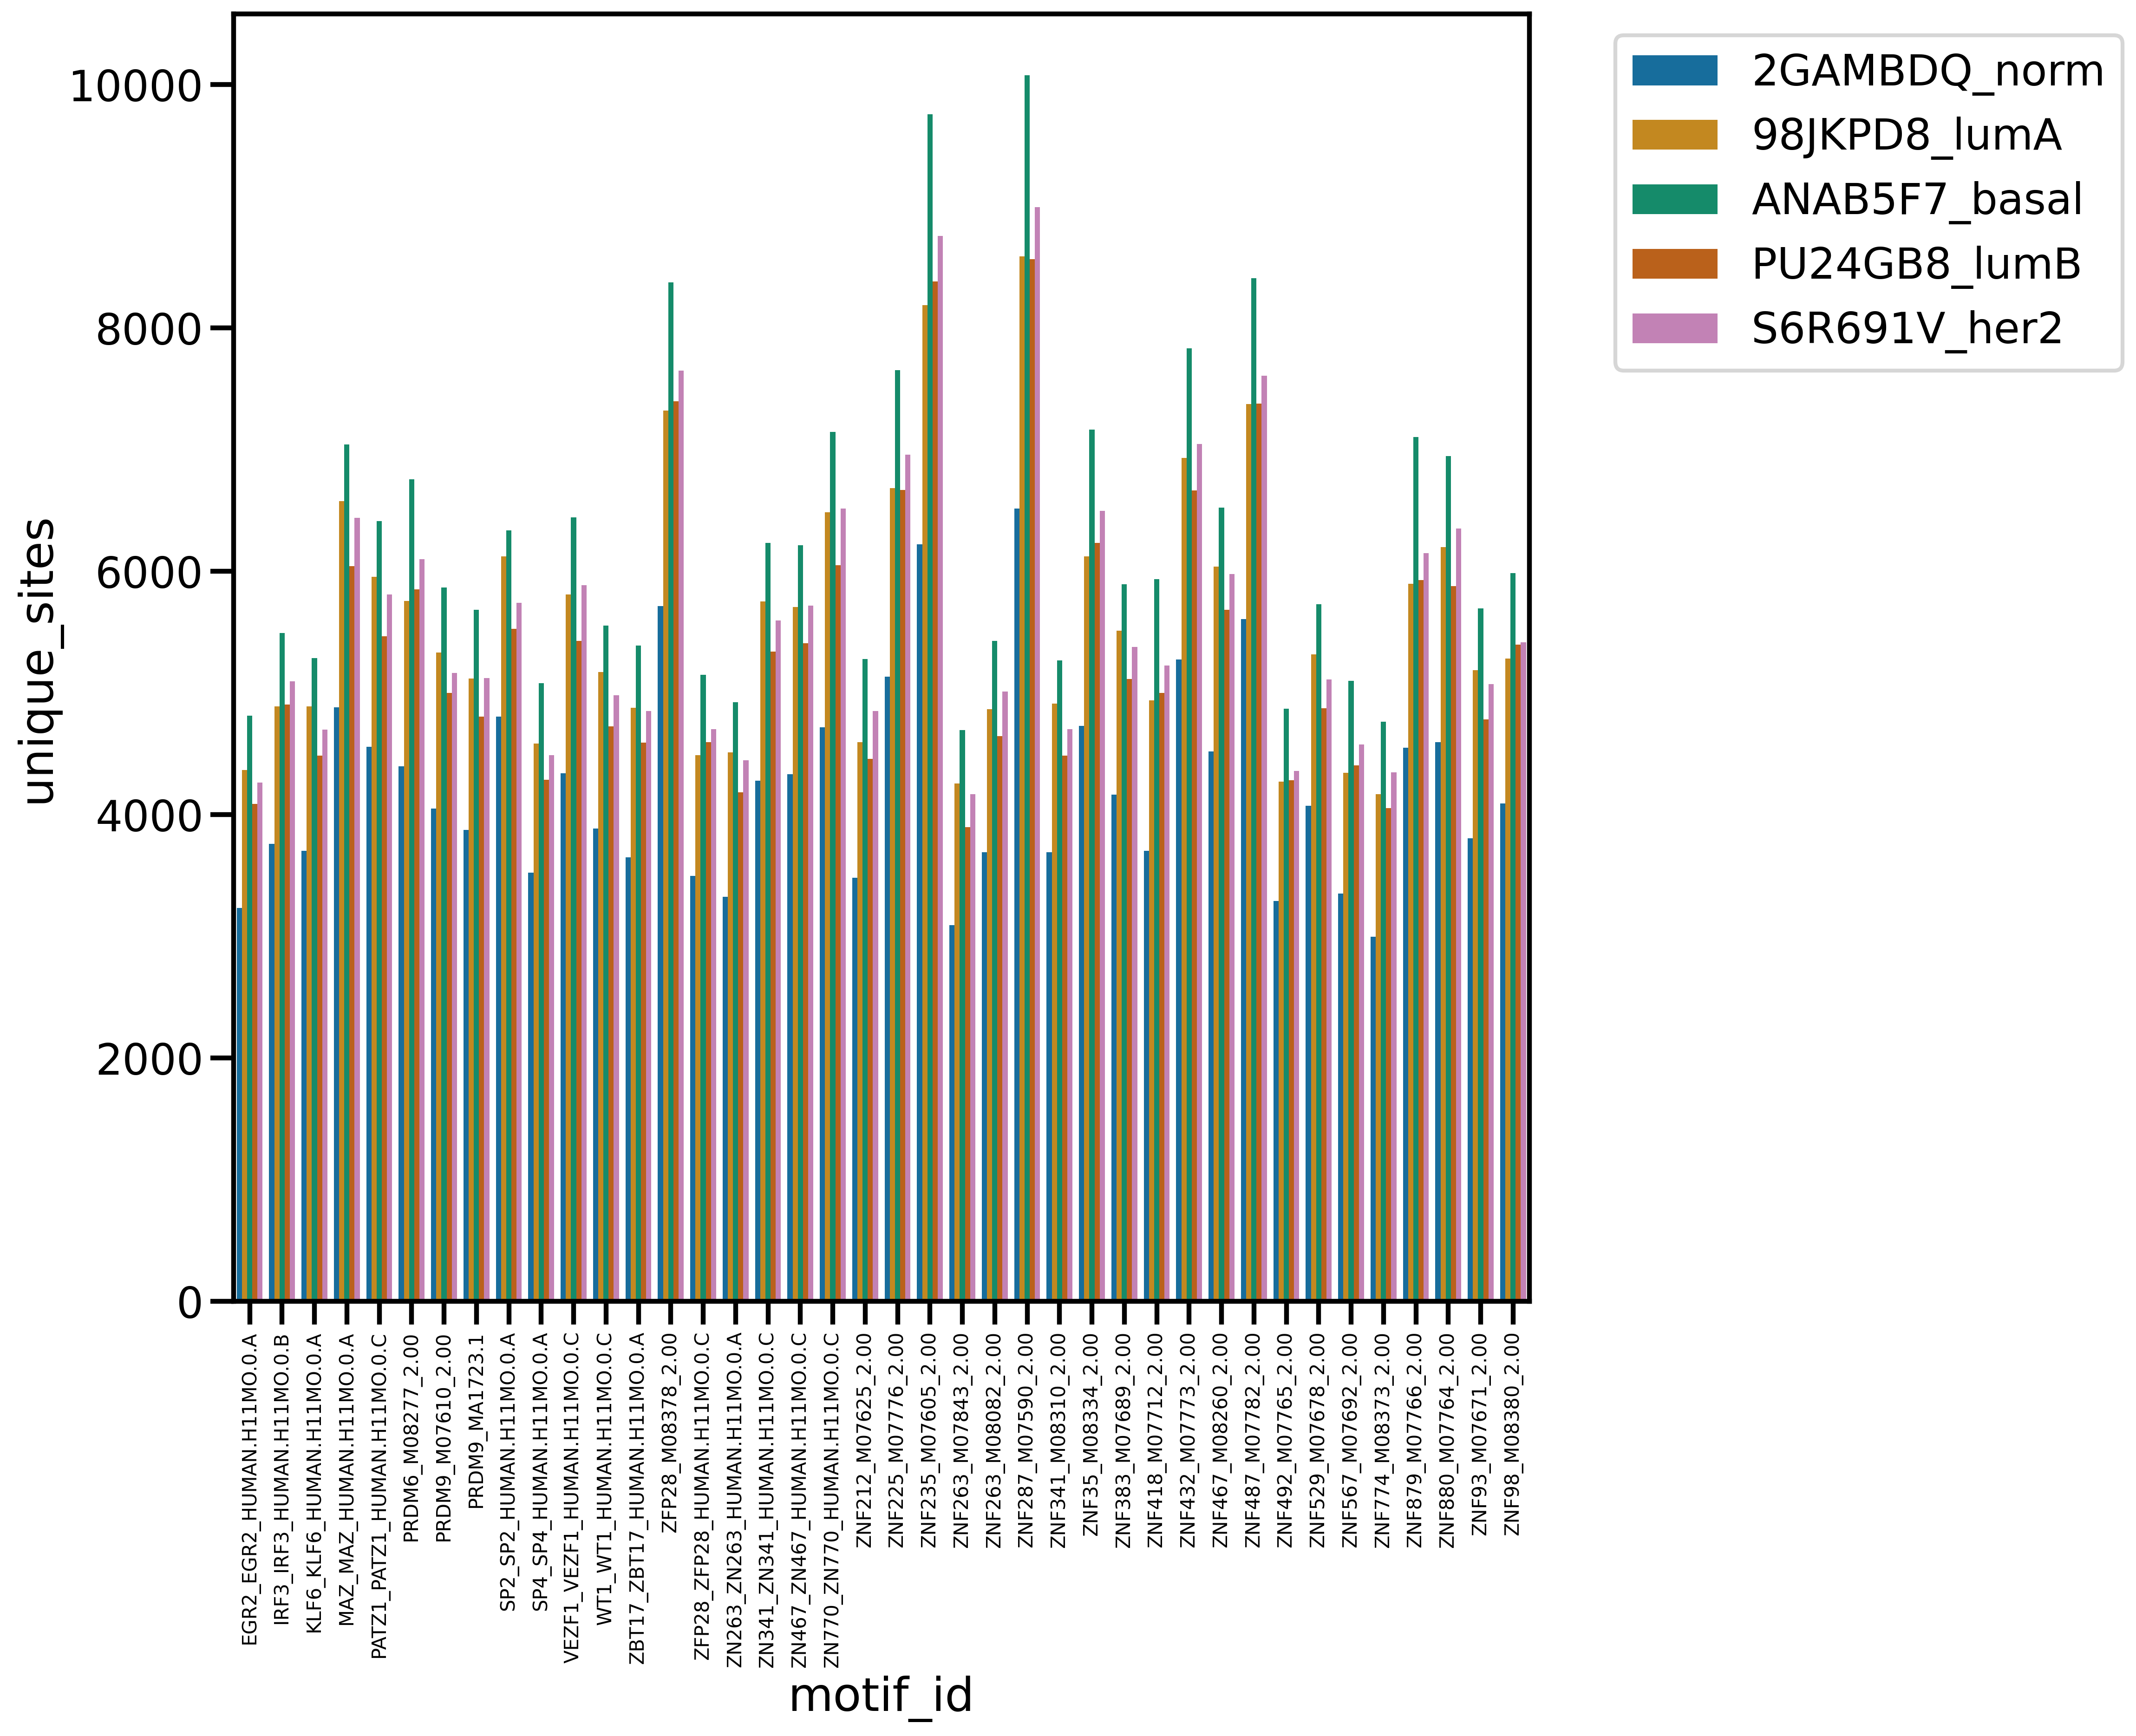

In [55]:
# filter DataFrame to only include rows where motif_id is in motif_ids_to_plot
varsites_filt = varsites[varsites['motif_id'].isin(top)]
# plot a barplot of the number of unique sites per motif
plt.figure(figsize=(12,12), dpi=300)
sns.barplot(data=varsites_filt, x='motif_id', y='unique_sites', hue='sample_id', palette='colorblind')
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()